# Introduction

QA plots for the TPC detector

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

## `pyROOT` env check

In [3]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.22/02


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.3`


# Initialization

In [4]:
%%cpp -d


#include <sPhenixStyle.C>

#include <TFile.h>
#include <TGraphAsymmErrors.h>
#include <TGraphErrors.h>
#include <TH1.h>
#include <TH2.h>
#include <TH3.h>
#include <TLatex.h>
#include <TLegend.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [5]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");


sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [6]:
%%cpp

const TString infile = "/phenix/u/jinhuang/links/sPHENIX_work/Fluence/ecce-dose-ep-2/SUM-g4score.root";
const TString disc = "e+p, 20+250 GeV/c, Pythia6 50#mub total x-sec.";                       //
const double nTarget = 100e15 * 50e-6;                                          //100 /fb @ 50ub
const TString projection_desc = "100 fb^-1, collision-originated fluence only";  //
const TString config = "Geant4 FTFP_BERT_HP"

(const TString &) "Geant4 FTFP_BERT_HP"[19]


In [7]:
%%cpp

TFile *_file0 = TFile::Open(infile);

TString description = disc;
TString configuration = config;

In [8]:
%%cpp

_file0->ls();

TFile**		/phenix/u/jinhuang/links/sPHENIX_work/Fluence/ecce-dose-ep-2/SUM-g4score.root	
 TFile*		/phenix/u/jinhuang/links/sPHENIX_work/Fluence/ecce-dose-ep-2/SUM-g4score.root	
  KEY: TH1D	hNChEta;1	Charged particle #eta distribution
  KEY: TH1D	hNormalization;1	Normalization
  KEY: TH3D	hScore_FullCylinder_dose;1	Mesh FullCylinder, Primitive scorer dose: score [Gy]
  KEY: TH3D	hScore_FullCylinder_edep;1	Mesh FullCylinder, Primitive scorer edep: score [MeV]
  KEY: TH3D	hScore_FullCylinder_flux_charged;1	Mesh FullCylinder, Primitive scorer flux_charged: score [percm2]
  KEY: TH3D	hScore_FullCylinder_flux_charged_EkMin1MeV;1	Mesh FullCylinder, Primitive scorer flux_charged_EkMin1MeV: score [percm2]
  KEY: TH3D	hScore_FullCylinder_flux_charged_EkMin20MeV;1	Mesh FullCylinder, Primitive scorer flux_charged_EkMin20MeV: score [percm2]
  KEY: TH3D	hScore_FullCylinder_flux_neutron;1	Mesh FullCylinder, Primitive scorer flux_neutron: score [percm2]
  KEY: TH3D	hScore_FullCylinder_flux_neutron_EkMi

In [9]:
%%cpp

TH1 * hNChEta = nullptr;
_file0->GetObject("hNChEta", hNChEta);
TH1 * hNormalization = nullptr;
_file0->GetObject("hNormalization", hNormalization);
TH1 * hVertexZ = nullptr;
_file0->GetObject("hVertexZ", hVertexZ);

TH3 * hScore_FullCylinder_dose = nullptr;
_file0->GetObject("hScore_FullCylinder_dose", hScore_FullCylinder_dose);
TH3 * hScore_FullCylinder_edep = nullptr;
_file0->GetObject("hScore_FullCylinder_edep", hScore_FullCylinder_edep);
TH3 * hScore_FullCylinder_flux_charged = nullptr;
_file0->GetObject("hScore_FullCylinder_flux_charged", hScore_FullCylinder_flux_charged);
TH3 * hScore_FullCylinder_flux_charged_EkMin1MeV = nullptr;
_file0->GetObject("hScore_FullCylinder_flux_charged_EkMin1MeV", hScore_FullCylinder_flux_charged_EkMin1MeV);
TH3 * hScore_FullCylinder_flux_charged_EkMin20MeV = nullptr;
_file0->GetObject("hScore_FullCylinder_flux_charged_EkMin20MeV", hScore_FullCylinder_flux_charged_EkMin20MeV);
TH3 * hScore_FullCylinder_flux_neutron = nullptr;
_file0->GetObject("hScore_FullCylinder_flux_neutron", hScore_FullCylinder_flux_neutron);
TH3 * hScore_FullCylinder_flux_neutron_EkMin100keV = nullptr;
_file0->GetObject("hScore_FullCylinder_flux_neutron_EkMin100keV", hScore_FullCylinder_flux_neutron_EkMin100keV);
TH3 * hScore_FullCylinder_flux_neutron_EkMin1MeV = nullptr;
_file0->GetObject("hScore_FullCylinder_flux_neutron_EkMin1MeV", hScore_FullCylinder_flux_neutron_EkMin1MeV);

In [10]:
%%cpp


const double nEvent = hNormalization->GetBinContent(1);

const double normalization = nTarget / nEvent;

# Check

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


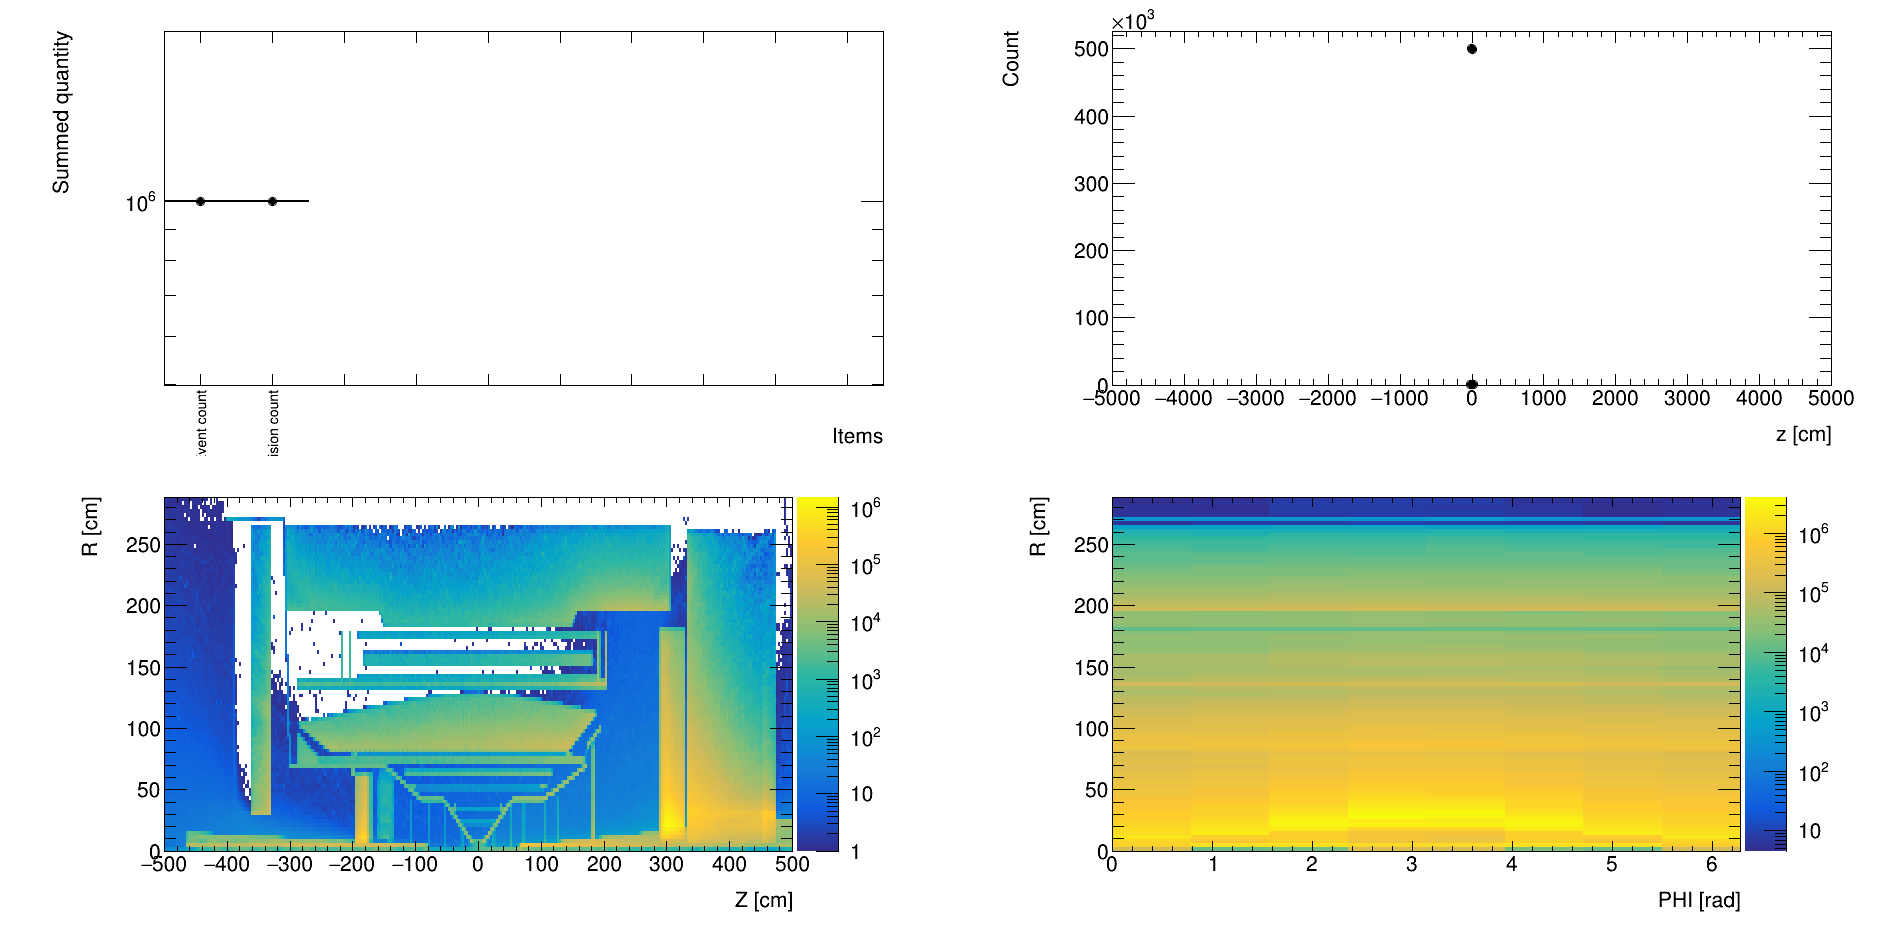

In [11]:
%%cpp

{
  assert(_file0);

  TCanvas *c1 = new TCanvas("Check", "Check", 1900, 960);
  c1->Divide(2, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  TH1 *hNormalization = (TH1 *) _file0->GetObjectChecked("hNormalization", "TH1");
  assert(hNormalization);

  double nEvent = hNormalization->GetBinContent(1);

  hNormalization->DrawClone();

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogy();

  TH1 *hVertexZ = (TH1 *) _file0->GetObjectChecked("hVertexZ", "TH1");
  assert(hVertexZ);

  hVertexZ = (TH1 *) (hVertexZ->DrawClone());

  hVertexZ->Sumw2();
  hVertexZ->Rebin(10);
  //  hVertexZ->Scale(1. / hNChEta->GetBinWidth(1) / nEvent);
  //  hVertexZ->GetYaxis()->SetTitle("dN_{Ch}/d#eta");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();
  p->SetRightMargin(.15);

  TH2 *hScore_FullCylinder_edep_zx = (TH2 *) hScore_FullCylinder_edep->Project3D("zx")->DrawClone("colz");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();
  p->SetRightMargin(.15);

  TH2 *hScore_FullCylinder_edep_zy = (TH2 *) hScore_FullCylinder_edep->Project3D("zy")->DrawClone("colz");

    c1->Draw();
}

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


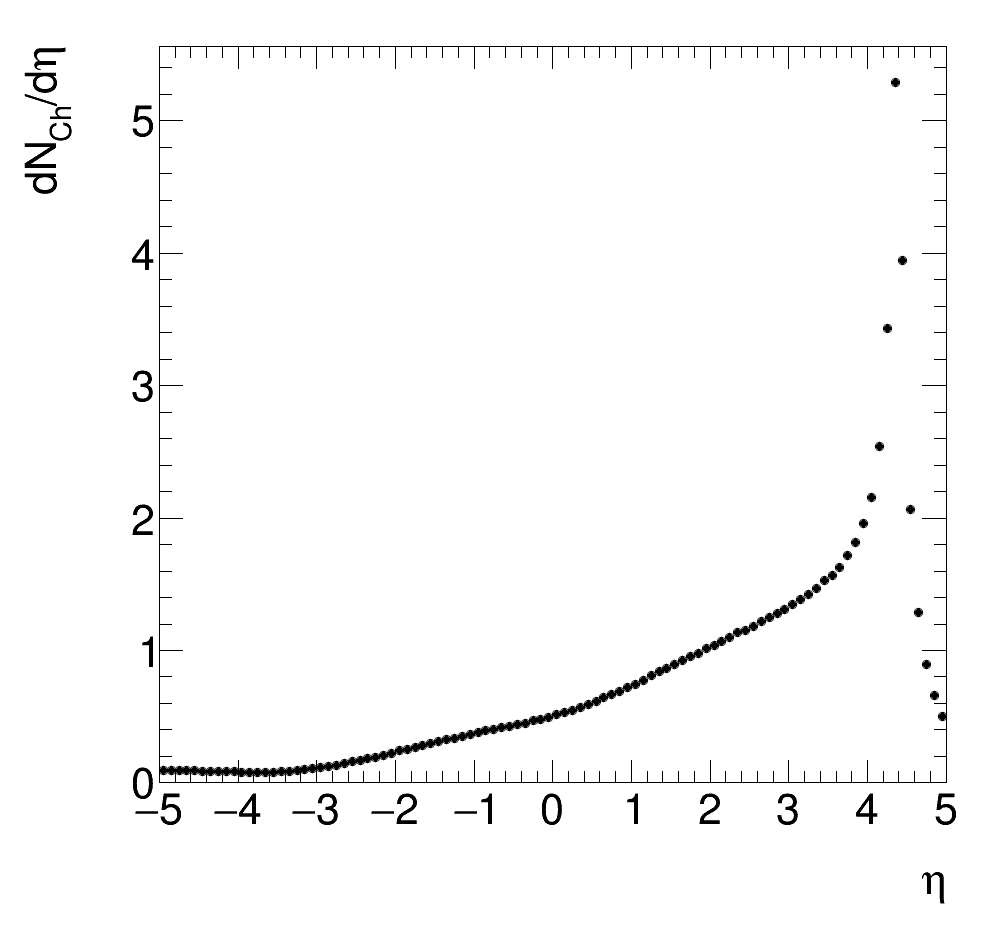

In [12]:
%%cpp

{
  assert(_file0);

  TCanvas *c1 = new TCanvas("dNchdEta", "dNchdEta", 1000, 960);
  int idx = 1;
  TPad *p;

  double nEvent = hNormalization->GetBinContent(1);

  p = (TPad *) c1->cd(idx++);
  c1->Update();
 // p->SetLogy();

  TH1 *hNChEta = (TH1 *) _file0->GetObjectChecked("hNChEta", "TH1");
  assert(hNChEta);

  hNChEta = (TH1 *) (hNChEta->DrawClone());

  hNChEta->Sumw2();
  hNChEta->Rebin(10);
  hNChEta->Scale(1. / hNChEta->GetBinWidth(1) / nEvent);
  hNChEta->GetYaxis()->SetTitle("dN_{Ch}/d#eta");
    
  c1->Draw();
}

# Projections

## Utility functions

In [13]:
%%cpp -d


TH1 *GetZProjection(const TH3 *h3, const double z_range_min, const double z_range_max, const double normalization)
{
  TH2 *h_Rz = (TH2 *) h3->Project3D("zx");
  h_Rz->Scale(normalization / h3->GetNbinsY());

  const int bin1 = h_Rz->GetXaxis()->FindBin(z_range_min);
  const int bin2 = h_Rz->GetXaxis()->FindBin(z_range_max);
  const int nbins = bin2 - bin1 + 1;
  assert(nbins >= 1);

  cout << "GetZProjection - " << h3->GetName() << ": z " << bin1 << ", " << bin2 << endl;

  TH1 *h_R =
      h_Rz->ProjectionY(Form("%s_ProjR_z_%d_%d",
                             h3->GetName(), bin1, bin2),
                        bin1, bin2);
  h_R->Scale(1. / nbins);

  h_R->SetBinContent(1, 0);
  //  h_R->SetBinContent(2, 0);

  h_R->SetLineWidth(3);

  return h_R;
}

In [14]:
%%cpp -d

TH1 *GetRProjectionMaxPhi(const TH3 *h3, const int r_bin, const double normalization)
{
    TH2 *h_Rz = (TH2 *) h3->Project3D("zx");
    // h_Rz->Scale(normalization / h3->GetNbinsY());
    
    for (int x =1; x<=h3->GetNbinsX() ; ++x)
        for (int z =1; z<=h3->GetNbinsZ() ; ++z)
        {
            double max = 0;
            
            for (int y =1; y<=h3->GetNbinsY() ; ++y)
            {
                const double value = h3->GetBinContent(x,y,z);
                
                if (value > max)
                    max = value;
            }
            
            h_Rz->SetBinContent( x , z, max );
        }
    h_Rz->Scale(normalization );
    
    assert(r_bin >= 1);

    cout << "GetRProjection - " << h3->GetName() << ": r_bin " << r_bin << endl;

    TH1 *h_R =
      h_Rz->ProjectionX(Form("%s_ProjR_r_%d",
                             h3->GetName(), r_bin),
                        r_bin, r_bin);

    h_R->SetLineWidth(3);

    return h_R;
}

In [15]:
%%cpp -d

TH1 *GetRProjection(const TH3 *h3, const int r_bin, const double normalization)
{
  TH2 *h_Rz = (TH2 *) h3->Project3D("zx");
  h_Rz->Scale(normalization / h3->GetNbinsY());

  assert(r_bin >= 1);

  cout << "GetRProjection - " << h3->GetName() << ": r_bin " << r_bin << endl;

  TH1 *h_R =
      h_Rz->ProjectionX(Form("%s_ProjR_r_%d",
                             h3->GetName(), r_bin),
                        r_bin, r_bin);

  h_R->SetLineWidth(3);

  return h_R;
}

In [16]:
%%cpp -d

void FullCylRProj(const double normalization, const TString projection_desc, const double z_range = 100)
{
  assert(_file0);

  const bool isEIC = description.Contains("eRHIC");
  const double vertical_scale = isEIC ? 1e-3 : 1;

  if (isEIC)
    cout << "FullCylRProj - use vertical scale for EIC = " << vertical_scale << endl;

  TString CanvasName = Form("FullCylRProj_%d", (int) (z_range));

  TCanvas *c1 = new TCanvas(CanvasName, CanvasName, 1900, 960);
  c1->Divide(2, 1);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);  ///////////////////////////////////////////////////////////////////////////////////////
  c1->Update();
  p->SetLogy();

  p->DrawFrame(0, 1e-3 * vertical_scale, 280, 1e6 * vertical_scale, ";R [cm];Radiation dose [rad]");

  TH1 *hScore_FullCylinder_dose_z = GetZProjection(hScore_FullCylinder_dose, -z_range, z_range, normalization * 100 /*Gy -> rad*/);

  hScore_FullCylinder_dose_z->SetBinContent(2, 0);  // avoid dose for the 2nd bin which touch vacumn region
  hScore_FullCylinder_dose_z->Draw("same");

    {
      TLegend *leg = new TLegend(.2, .7, .9, .9);
      leg->AddEntry("", isEIC ? "#it{#bf{ECCE}} Simulation" : "#it{#bf{sPHENIX}} Simulation, "+configuration+"", "");
      leg->AddEntry("", description, "");
      leg->AddEntry("", projection_desc, "");
      leg->AddEntry("", Form("Averaged over |z|<%.0f cm, R>4 cm", z_range), "");
      leg->AddEntry(hScore_FullCylinder_dose_z, "Radiation dose", "l");
      leg->Draw();
    }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  p->DrawFrame(0, 1e6 * vertical_scale, 280, 1e17 * vertical_scale, ";R [cm];Fluence [N/cm^{2}]");
  //
  TH1 *hScore_FullCylinder_flux_neutron_EkMin100keV_z = GetZProjection(hScore_FullCylinder_flux_neutron_EkMin100keV, -z_range, z_range, normalization);
  TH1 *hScore_FullCylinder_flux_neutron_EkMin1MeV_z = GetZProjection(hScore_FullCylinder_flux_neutron_EkMin1MeV, -z_range, z_range, normalization);
  TH1 *hScore_FullCylinder_flux_neutron_z = GetZProjection(hScore_FullCylinder_flux_neutron, -z_range, z_range, normalization);

  TH1 *hScore_FullCylinder_flux_charged_EkMin20MeV_z = GetZProjection(hScore_FullCylinder_flux_charged_EkMin20MeV, -z_range, z_range, normalization);
  TH1 *hScore_FullCylinder_flux_charged_EkMin1MeV_z = GetZProjection(hScore_FullCylinder_flux_charged_EkMin1MeV, -z_range, z_range, normalization);
  TH1 *hScore_FullCylinder_flux_charged_z = GetZProjection(hScore_FullCylinder_flux_charged, -z_range, z_range, normalization);

  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->SetLineColor(kOrange - 3);
  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->SetLineStyle(kDashed);
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->SetLineColor(kRed + 2);
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->SetLineStyle(kDotted);
  hScore_FullCylinder_flux_neutron_z->SetLineColor(kPink + 8);

  hScore_FullCylinder_flux_charged_EkMin20MeV_z->SetLineColor(kBlue + 2);
  hScore_FullCylinder_flux_charged_EkMin20MeV_z->SetLineStyle(kDashed);
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->SetLineColor(kAzure);
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->SetLineStyle(kDotted);
  hScore_FullCylinder_flux_charged_z->SetLineColor(kCyan - 2);

  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->Draw("same");
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->Draw("same");
  hScore_FullCylinder_flux_neutron_z->Draw("same");

  hScore_FullCylinder_flux_charged_EkMin20MeV_z->Draw("same");
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->Draw("same");
  hScore_FullCylinder_flux_charged_z->Draw("same");
  //
    {
      TLegend *leg = new TLegend(.3, .55, .9, .9);
      leg->AddEntry("", isEIC ? "#it{#bf{ECCE}} Simulation" : "#it{#bf{sPHENIX}} Simulation, "+configuration+"", "");
      leg->AddEntry("", description, "");
      leg->AddEntry("", projection_desc, "");
      leg->AddEntry("", Form("Averaged over |z|<%.0f cm, R>2 cm", z_range), "");

      leg->AddEntry(hScore_FullCylinder_flux_charged_z, "All charged particle", "l");
      leg->AddEntry(hScore_FullCylinder_flux_charged_EkMin1MeV_z, "Min-1-MeV Charged particle", "l");
      leg->AddEntry(hScore_FullCylinder_flux_charged_EkMin20MeV_z, "Min-20-MeV Charged particle", "l");

      leg->AddEntry(hScore_FullCylinder_flux_neutron_z, "All neutron", "l");
      leg->AddEntry(hScore_FullCylinder_flux_neutron_EkMin100keV_z, "Min-100-keV Neutron", "l");
      leg->AddEntry(hScore_FullCylinder_flux_neutron_EkMin1MeV_z, "Min-1-MeV Neutron", "l");

      leg->Draw();
    }

  c1->Draw();
}

In [17]:
%%cpp -d

void FullCylZProj(const double normalization, const TString projection_desc, const int r_bin = 2)
{
  assert(_file0);

  const double vertical_scale =  1e-3;

    cout << "FullCylZProj - use vertical scale for EIC = " << vertical_scale << endl;

  const double r_min = hScore_FullCylinder_dose->GetZaxis()->GetBinLowEdge(r_bin);
  const double r_max = hScore_FullCylinder_dose->GetZaxis()->GetBinUpEdge(r_bin);

  TString CanvasName = Form("FullCylZProj_%d", (int) (r_bin));

  TCanvas *c1 = new TCanvas(CanvasName, CanvasName, 1900, 800);
  c1->Divide(2, 1);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);  ///////////////////////////////////////////////////////////////////////////////////////
  c1->Update();
  p->SetLogy();

  p->DrawFrame(-450, 1e2 * vertical_scale, 450, 1e9 * vertical_scale, ";z [cm];Radiation dose [rad]");

  TH1 *hScore_FullCylinder_dose_z = GetRProjection(hScore_FullCylinder_dose, r_bin, normalization * 100 /*Gy -> rad*/);

  hScore_FullCylinder_dose_z->SetBinContent(2, 0);  // avoid dose for the 2nd bin which touch vacumn region
  hScore_FullCylinder_dose_z->Draw("same");

    {
  TLegend *leg = new TLegend(.2, .7, .9, .9);
  leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " +configuration+"", "");
  leg->AddEntry("", description, "");
  leg->AddEntry("", projection_desc, "");
  leg->AddEntry("", Form("Averaged over %.1f<R<%.1f cm", r_min, r_max), "");
  leg->AddEntry(hScore_FullCylinder_dose_z, "Radiation dose", "l");
  leg->Draw();
    }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  p->DrawFrame(-450, 1e8 * vertical_scale, 450, 1e18 * vertical_scale, ";z [cm];Fluence [N/cm^{2}]");
  //
  TH1 *hScore_FullCylinder_flux_neutron_EkMin100keV_z = GetRProjection(hScore_FullCylinder_flux_neutron_EkMin100keV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_neutron_EkMin1MeV_z = GetRProjection(hScore_FullCylinder_flux_neutron_EkMin1MeV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_neutron_z = GetRProjection(hScore_FullCylinder_flux_neutron, r_bin, normalization);

  TH1 *hScore_FullCylinder_flux_charged_EkMin20MeV_z = GetRProjection(hScore_FullCylinder_flux_charged_EkMin20MeV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_charged_EkMin1MeV_z = GetRProjection(hScore_FullCylinder_flux_charged_EkMin1MeV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_charged_z = GetRProjection(hScore_FullCylinder_flux_charged, r_bin, normalization);

  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->SetLineColor(kOrange - 3);
  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->SetLineStyle(kDashed);
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->SetLineColor(kRed + 2);
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->SetLineStyle(kDotted);
  hScore_FullCylinder_flux_neutron_z->SetLineColor(kPink + 8);

  hScore_FullCylinder_flux_charged_EkMin20MeV_z->SetLineColor(kBlue + 2);
  hScore_FullCylinder_flux_charged_EkMin20MeV_z->SetLineStyle(kDashed);
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->SetLineColor(kAzure);
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->SetLineStyle(kDotted);
  hScore_FullCylinder_flux_charged_z->SetLineColor(kCyan - 2);

  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->Draw("same");
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->Draw("same");
  hScore_FullCylinder_flux_neutron_z->Draw("same");

  hScore_FullCylinder_flux_charged_EkMin20MeV_z->Draw("same");
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->Draw("same");
  hScore_FullCylinder_flux_charged_z->Draw("same");
  //
    {
      TLegend *leg = new TLegend(.3, .58, .9, .93);
      leg->AddEntry("",  "#it{#bf{ECCE}} Simulation"  +configuration+"", "");
      leg->AddEntry("", description, "");
      leg->AddEntry("", projection_desc, "");
      leg->AddEntry("", Form("Averaged over %.1f<R<%.1f cm", r_min, r_max), "");

      leg->AddEntry(hScore_FullCylinder_flux_charged_z, "All charged particle", "l");
      leg->AddEntry(hScore_FullCylinder_flux_charged_EkMin1MeV_z, "Min-1-MeV Charged particle", "l");
      leg->AddEntry(hScore_FullCylinder_flux_charged_EkMin20MeV_z, "Min-20-MeV Charged particle", "l");

      leg->AddEntry(hScore_FullCylinder_flux_neutron_z, "All neutron", "l");
      leg->AddEntry(hScore_FullCylinder_flux_neutron_EkMin100keV_z, "Min-100-keV Neutron", "l");
      leg->AddEntry(hScore_FullCylinder_flux_neutron_EkMin1MeV_z, "Min-1-MeV Neutron", "l");

      leg->Draw();
    }

  c1->Draw();
}

In [18]:
%%cpp -d

void FullCylZProjMaxPhi(const double normalization, const TString projection_desc, const int r_bin = 2)
{
  assert(_file0);

  const double vertical_scale =  1e-3;

    cout << "FullCylZProj - use vertical scale for EIC = " << vertical_scale << endl;

  const double r_min = hScore_FullCylinder_dose->GetZaxis()->GetBinLowEdge(r_bin);
  const double r_max = hScore_FullCylinder_dose->GetZaxis()->GetBinUpEdge(r_bin);

  TString CanvasName = Form("FullCylZProj_%d", (int) (r_bin));

  TCanvas *c1 = new TCanvas(CanvasName, CanvasName, 2500, 800);
  c1->Divide(2, 1);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);  ///////////////////////////////////////////////////////////////////////////////////////
  c1->Update();
  p->SetLogy();

  p->DrawFrame(-450, 1e2 * vertical_scale, 450, 1e9 * vertical_scale, ";z [cm];Radiation dose [rad]");

  TH1 *hScore_FullCylinder_dose_z = GetRProjectionMaxPhi(hScore_FullCylinder_dose, r_bin, normalization * 100 /*Gy -> rad*/);

  hScore_FullCylinder_dose_z->SetBinContent(2, 0);  // avoid dose for the 2nd bin which touch vacumn region
  hScore_FullCylinder_dose_z->Draw("same");

    {
      TLegend *leg = new TLegend(.18, .5, .9, .9);
      leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " +configuration+"", "");
      leg->AddEntry("", description, "");
      leg->AddEntry("", projection_desc, "");
      leg->AddEntry("", Form("%.1f<R<%.1f cm, max azimuthal sector", r_min, r_max), "");
      leg->AddEntry(hScore_FullCylinder_dose_z, "Radiation dose", "l");
      leg->SetFillStyle(0);
      leg->Draw();
    }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  p->DrawFrame(-450, 1e8 * vertical_scale, 450, 1e18 * vertical_scale, ";z [cm];Fluence [N/cm^{2}]");
  //
  TH1 *hScore_FullCylinder_flux_neutron_EkMin100keV_z = GetRProjectionMaxPhi(hScore_FullCylinder_flux_neutron_EkMin100keV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_neutron_EkMin1MeV_z = GetRProjectionMaxPhi(hScore_FullCylinder_flux_neutron_EkMin1MeV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_neutron_z = GetRProjectionMaxPhi(hScore_FullCylinder_flux_neutron, r_bin, normalization);

  TH1 *hScore_FullCylinder_flux_charged_EkMin20MeV_z = GetRProjectionMaxPhi(hScore_FullCylinder_flux_charged_EkMin20MeV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_charged_EkMin1MeV_z = GetRProjectionMaxPhi(hScore_FullCylinder_flux_charged_EkMin1MeV, r_bin, normalization);
  TH1 *hScore_FullCylinder_flux_charged_z = GetRProjectionMaxPhi(hScore_FullCylinder_flux_charged, r_bin, normalization);

  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->SetLineColor(kOrange - 3);
  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->SetLineStyle(kDashed);
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->SetLineColor(kRed + 2);
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->SetLineStyle(kDotted);
  hScore_FullCylinder_flux_neutron_z->SetLineColor(kPink + 8);

  hScore_FullCylinder_flux_charged_EkMin20MeV_z->SetLineColor(kBlue + 2);
  hScore_FullCylinder_flux_charged_EkMin20MeV_z->SetLineStyle(kDashed);
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->SetLineColor(kAzure);
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->SetLineStyle(kDotted);
  hScore_FullCylinder_flux_charged_z->SetLineColor(kCyan - 2);

  hScore_FullCylinder_flux_neutron_EkMin1MeV_z->Draw("same");
  hScore_FullCylinder_flux_neutron_EkMin100keV_z->Draw("same");
  hScore_FullCylinder_flux_neutron_z->Draw("same");

  hScore_FullCylinder_flux_charged_EkMin20MeV_z->Draw("same");
  hScore_FullCylinder_flux_charged_EkMin1MeV_z->Draw("same");
  hScore_FullCylinder_flux_charged_z->Draw("same");
  //
    {
      TLegend *leg = new TLegend(.18, .5, .9, .93);
      leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " +configuration+"", "");
      leg->AddEntry("", description, "");
      leg->AddEntry("", projection_desc, "");
      leg->AddEntry("", Form("%.1f<R<%.1f cm, max azimuthal sector", r_min, r_max), "");

      leg->AddEntry(hScore_FullCylinder_flux_charged_z, "All charged particle", "l");
      leg->AddEntry(hScore_FullCylinder_flux_charged_EkMin1MeV_z, "Min-1-MeV Charged particle", "l");
      leg->AddEntry(hScore_FullCylinder_flux_charged_EkMin20MeV_z, "Min-20-MeV Charged particle", "l");

      leg->AddEntry(hScore_FullCylinder_flux_neutron_z, "All neutron", "l");
      leg->AddEntry(hScore_FullCylinder_flux_neutron_EkMin100keV_z, "Min-100-keV Neutron", "l");
      leg->AddEntry(hScore_FullCylinder_flux_neutron_EkMin1MeV_z, "Min-1-MeV Neutron", "l");

      leg->SetFillStyle(0);
        
      leg->Draw();
    }

  c1->Draw();
}

## Full Cylinders

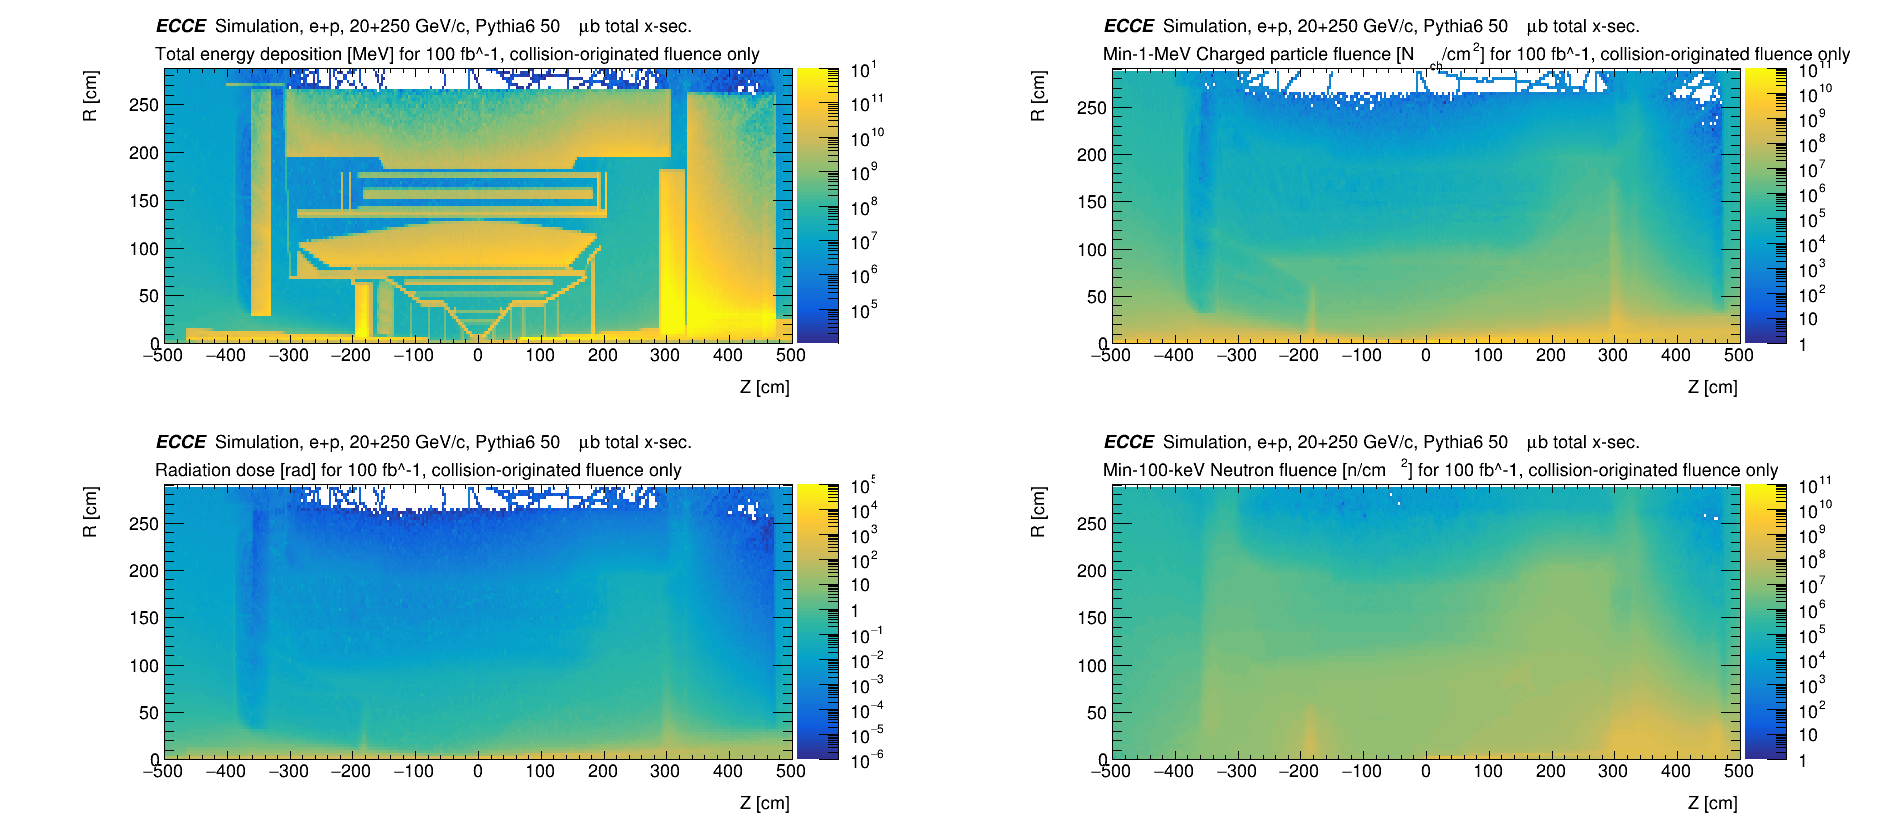

In [19]:
%%cpp 



{
  assert(_file0);

  TCanvas *c1 = new TCanvas("FullCylEIC", "FullCylEIC", 1900, 860);
  c1->Divide(2, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();
  p->SetRightMargin(.15);
  p->SetTopMargin(.15);

  TH2 *hScore_FullCylinder_edep_zx = (TH2 *)hScore_FullCylinder_edep->Project3D("zx")->DrawClone("colz");
  hScore_FullCylinder_edep_zx->Scale(normalization);
  hScore_FullCylinder_edep_zx->GetZaxis()->SetRangeUser(1e4, 1e12);
  //  hScore_FullCylinder_edep_zx->GetXaxis()->SetRangeUser(-380, 380);

    {
      TLegend *leg = new TLegend(-.1, .85, .9, .99);
      leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " + description, "");
      leg->AddEntry("", "Total energy deposition [MeV] for " + projection_desc, "");
      leg->Draw();
    }
    
  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();
  p->SetRightMargin(.15);
  p->SetTopMargin(.15);

  TH2 *hScore_FullCylinder_flux_charged_EkMin1MeV_zx =  (TH2 *)hScore_FullCylinder_flux_charged_EkMin1MeV->Project3D("zx")->DrawClone("colz");
  hScore_FullCylinder_flux_charged_EkMin1MeV_zx->Scale(normalization / hScore_FullCylinder_flux_charged_EkMin1MeV->GetNbinsY());
  hScore_FullCylinder_flux_charged_EkMin1MeV_zx->GetZaxis()->SetRangeUser(1, 1e11);
  hScore_FullCylinder_flux_charged_EkMin1MeV_zx->GetYaxis()->SetRangeUser(2, 300);
  //  hScore_FullCylinder_flux_charged_EkMin1MeV_zx->GetXaxis()->SetRangeUser(-380, 380);
    {
      TLegend *leg = new TLegend(-.1, .85, .9, .99);
      leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " + description, "");
      leg->AddEntry("", "Min-1-MeV Charged particle fluence [N_{ch}/cm^{2}] for " + projection_desc, "");
      leg->Draw();
    }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();
  p->SetRightMargin(.15);
  p->SetTopMargin(.15);

  TH2 *hScore_FullCylinder_dose_zx = (TH2 *) hScore_FullCylinder_dose->Project3D("zx")->DrawClone("colz");
  hScore_FullCylinder_dose_zx->Scale(normalization / hScore_FullCylinder_dose->GetNbinsY() * 100.);  // Gy -> Rad
  hScore_FullCylinder_dose_zx->GetZaxis()->SetRangeUser(1e-6, 1e5);
  hScore_FullCylinder_dose_zx->GetYaxis()->SetRangeUser(2, 300);
  //  hScore_FullCylinder_dose_zx->GetXaxis()->SetRangeUser(-380, 380);

    {
      TLegend *leg = new TLegend(-.1, .85, .9, .99);
      leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " + description, "");
      leg->AddEntry("", "Radiation dose [rad] for " + projection_desc, "");
      leg->Draw();
    }

  //  p = (TPad *) c1->cd(idx++);
  //  c1->Update();
  //  p->SetLogz();
  //  p->SetRightMargin(.15);
  //
  //  TH2 *hScore_FullCylinder_flux_charged_EkMin100MeV_zx =  (TH2 *)hScore_FullCylinder_flux_charged_EkMin100MeV->Project3D("zx")->DrawClone("colz");
  //  hScore_FullCylinder_flux_charged_EkMin100MeV_zx->Scale(normalization / hScore_FullCylinder_flux_charged_EkMin100MeV_zx->GetNbinsY());

  //  p = (TPad *) c1->cd(idx++);
  //  c1->Update();
  //  p->SetLogz();
  //  p->SetRightMargin(.15);
  //
  //  TH2 *hScore_FullCylinder_flux_neutron_zx =  (TH2 *)hScore_FullCylinder_flux_neutron->Project3D("zx")->DrawClone("colz");
  //  hScore_FullCylinder_flux_neutron_zx->Scale(normalization / hScore_FullCylinder_flux_neutron->GetNbinsY());

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();
  p->SetRightMargin(.15);
  p->SetTopMargin(.15);

  TH2 *hScore_FullCylinder_flux_neutron_EkMin100keV_zx = (TH2 *) hScore_FullCylinder_flux_neutron_EkMin100keV->Project3D("zx")->DrawClone("colz");
  hScore_FullCylinder_flux_neutron_EkMin100keV_zx->Scale(normalization / hScore_FullCylinder_flux_neutron_EkMin100keV->GetNbinsY());
  hScore_FullCylinder_flux_neutron_EkMin100keV_zx->GetZaxis()->SetRangeUser(1, 1e11);
  hScore_FullCylinder_flux_neutron_EkMin100keV_zx->GetYaxis()->SetRangeUser(2, 300);
  //  hScore_FullCylinder_flux_neutron_EkMin100keV_zx->GetXaxis()->SetRangeUser(-380, 380);

    {
      TLegend *leg = new TLegend(-.1, .85, .9, .99);
      leg->AddEntry("", "#it{#bf{ECCE}} Simulation, " + description, "");
      leg->AddEntry("", "Min-100-keV Neutron fluence [n/cm^{2}] for " + projection_desc, "");
      leg->Draw();
    }
 
 c1->Draw();
}

## R-dependency

GetZProjection - hScore_FullCylinder_dose: z 125, 188
GetZProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: z 125, 188
GetZProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: z 125, 188
GetZProjection - hScore_FullCylinder_flux_neutron: z 125, 188
GetZProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: z 125, 188
GetZProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: z 125, 188
GetZProjection - hScore_FullCylinder_flux_charged: z 125, 188


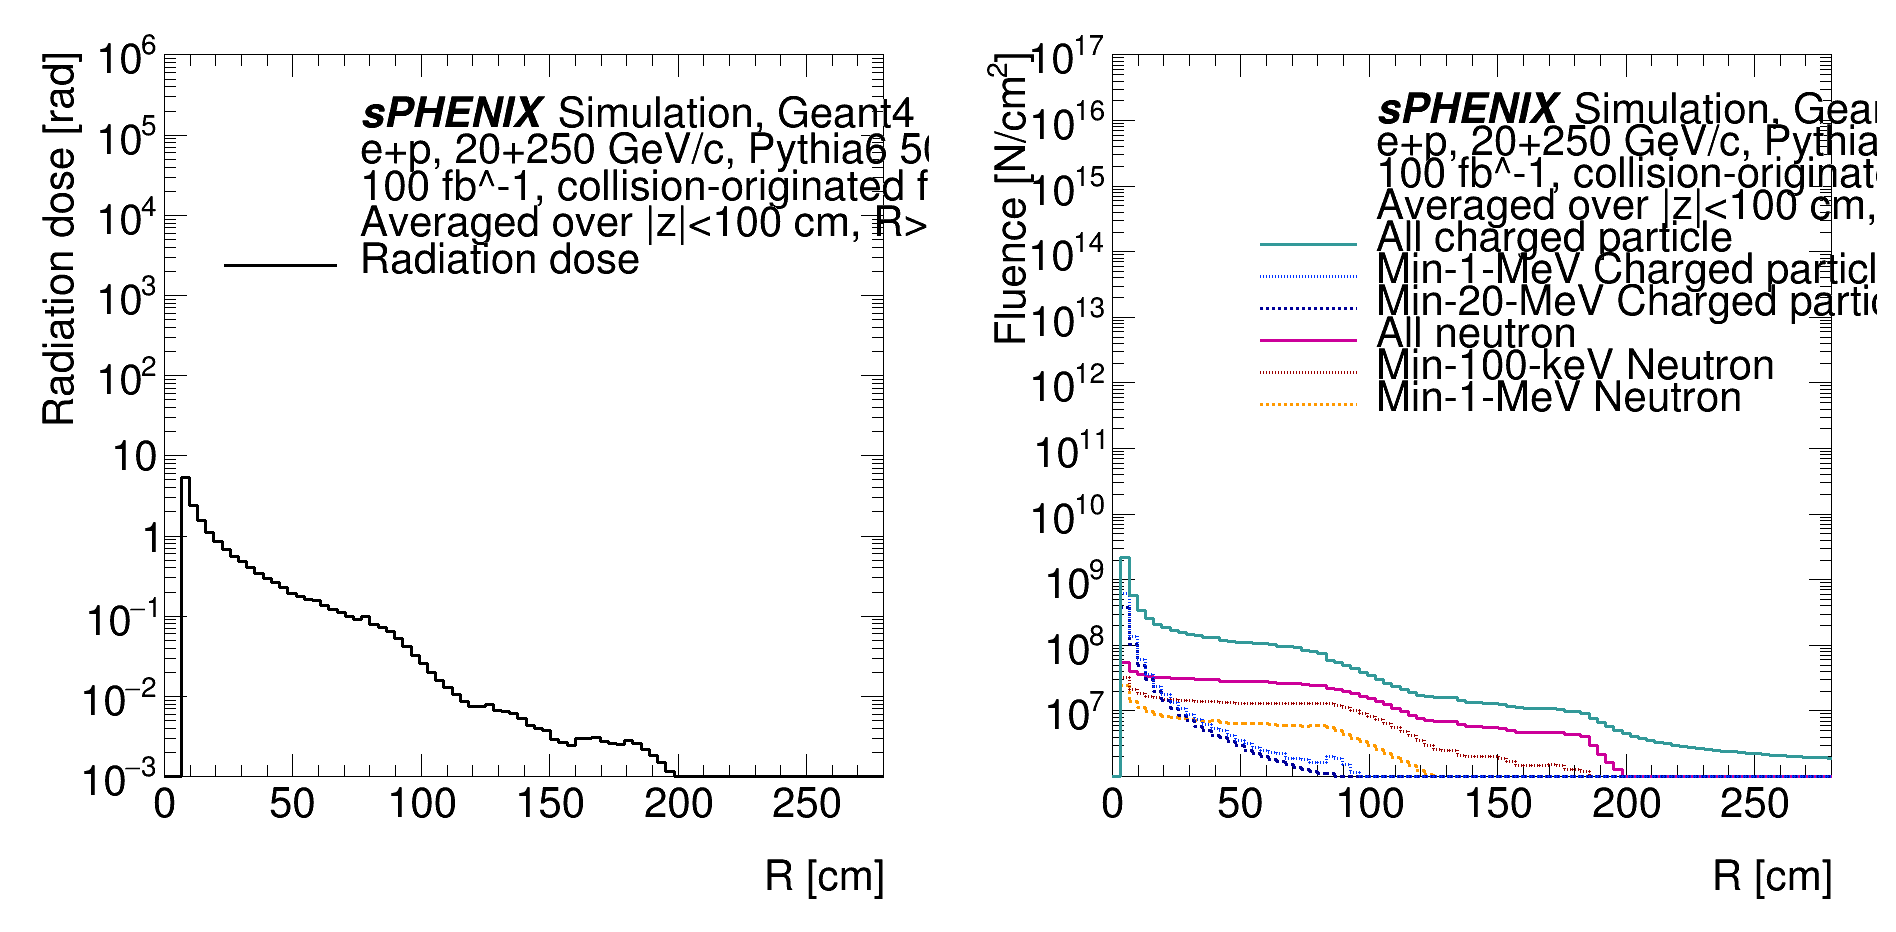

In [20]:
%%cpp

FullCylRProj(normalization, projection_desc, 100);

GetZProjection - hScore_FullCylinder_dose: z 147, 166
GetZProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: z 147, 166
GetZProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: z 147, 166
GetZProjection - hScore_FullCylinder_flux_neutron: z 147, 166
GetZProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: z 147, 166
GetZProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: z 147, 166
GetZProjection - hScore_FullCylinder_flux_charged: z 147, 166


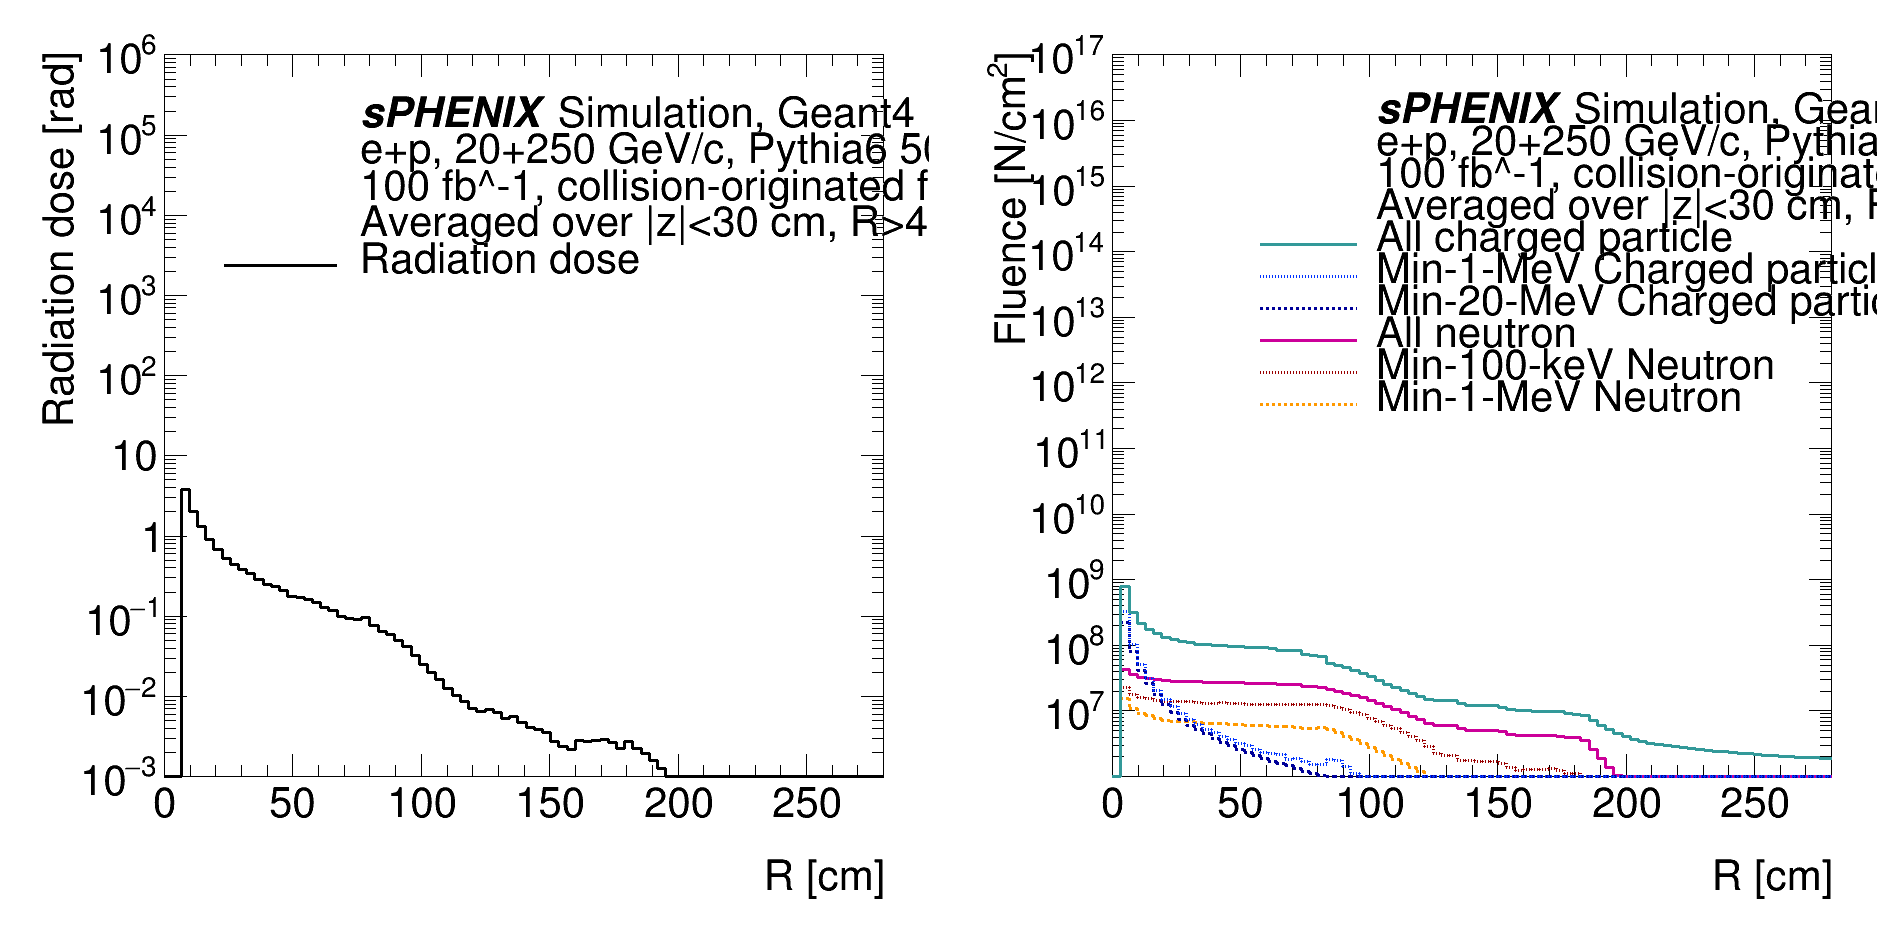

In [21]:
%%cpp

FullCylRProj(normalization, projection_desc, 30);

## Z-dependency, averaged over phi

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 7
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 7
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 7


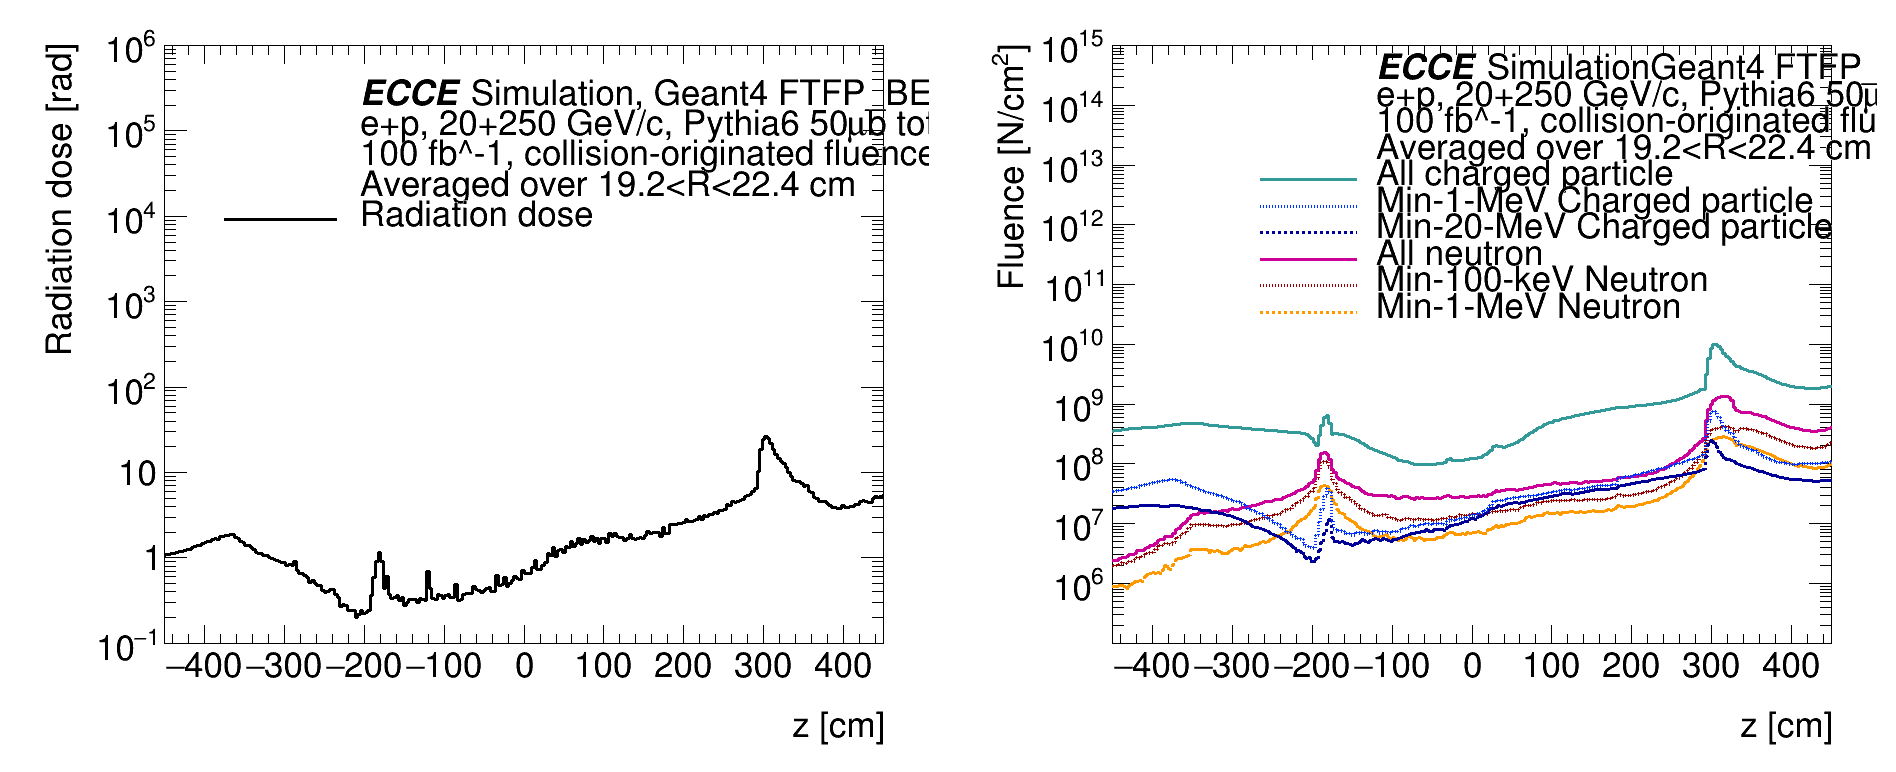

In [22]:
%%cpp

FullCylZProj(normalization, projection_desc, 7);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 6
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 6
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 6
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 6
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 6
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 6
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 6


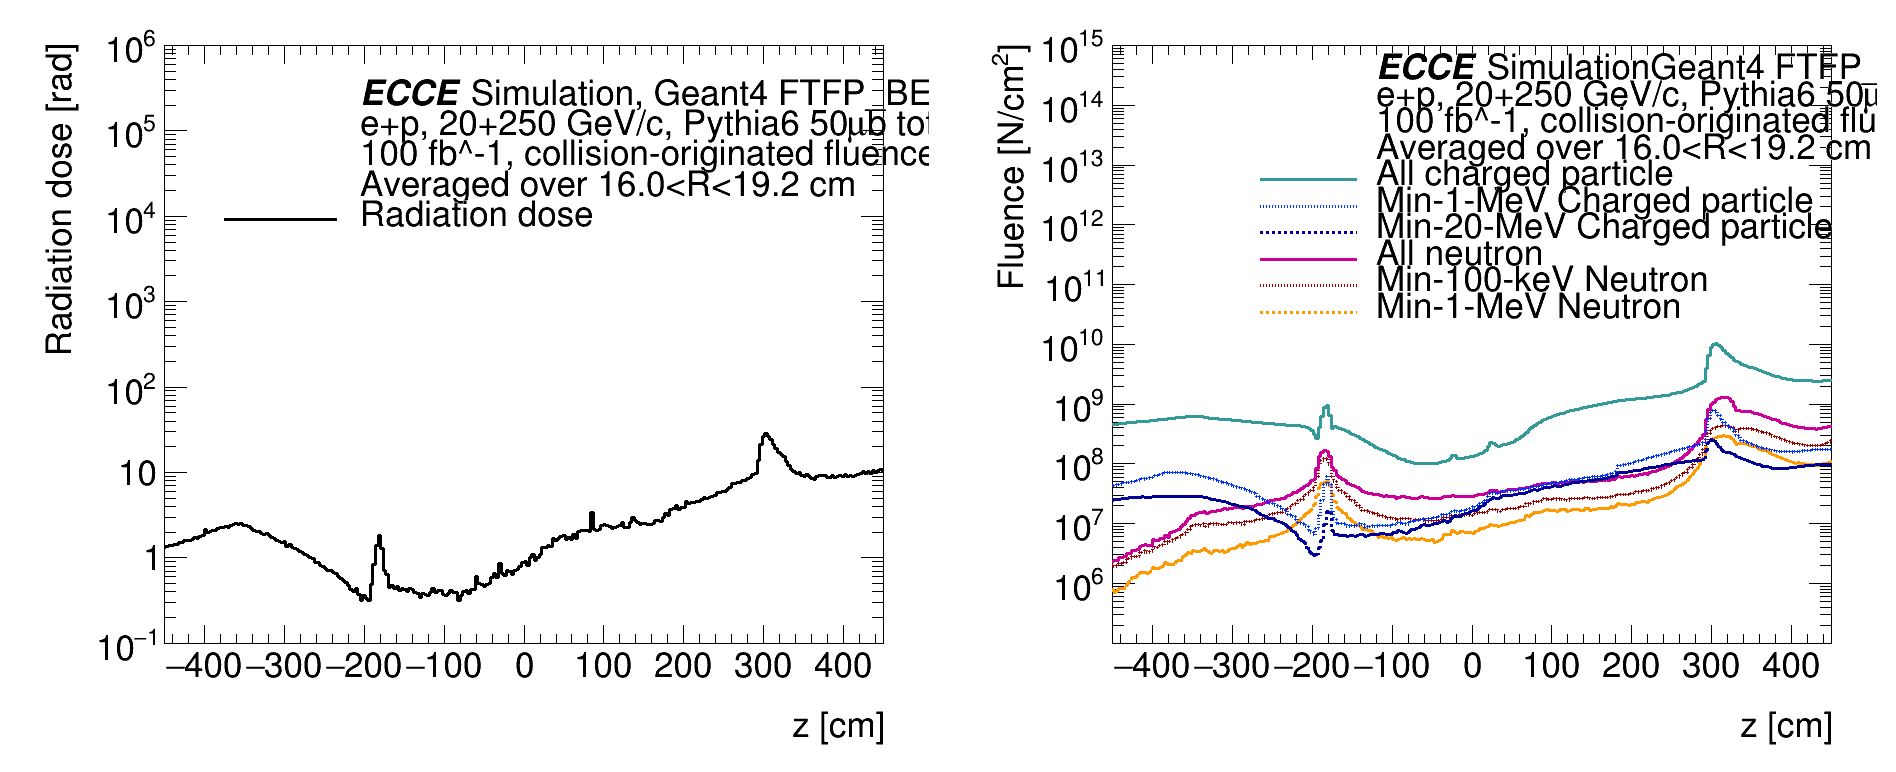

In [23]:
%%cpp

FullCylZProj(normalization, projection_desc, 6);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 5
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 5
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 5
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 5
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 5
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 5
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 5


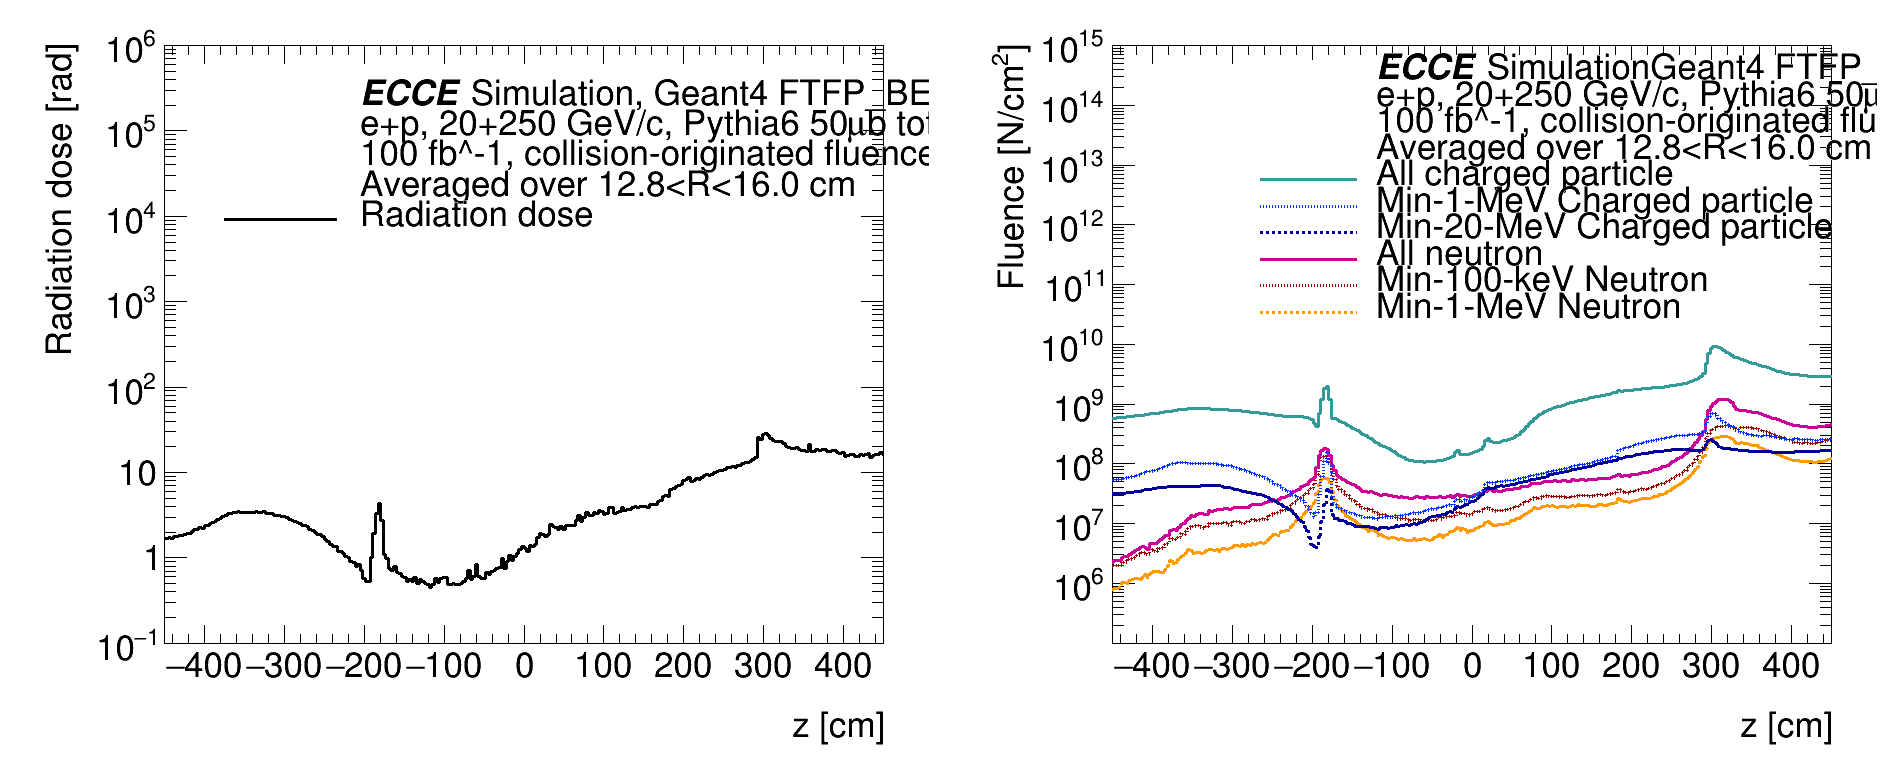

In [24]:
%%cpp

FullCylZProj(normalization, projection_desc, 5);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 4
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 4
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 4
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 4
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 4
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 4
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 4


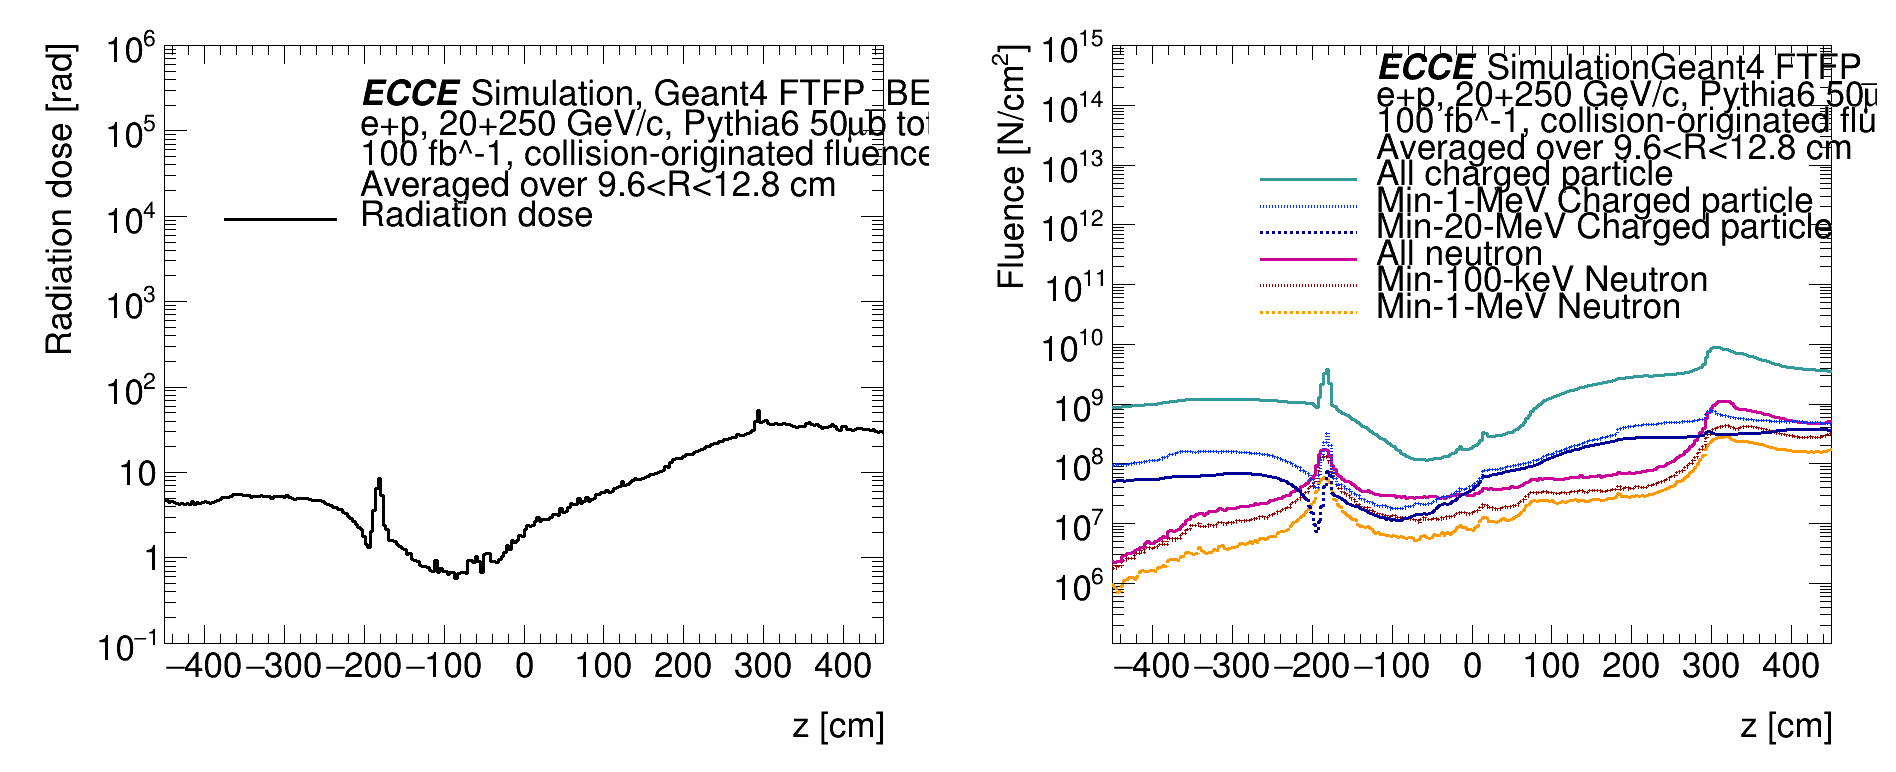

In [25]:
%%cpp

FullCylZProj(normalization, projection_desc, 4);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 3
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 3
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 3
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 3
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 3
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 3
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 3


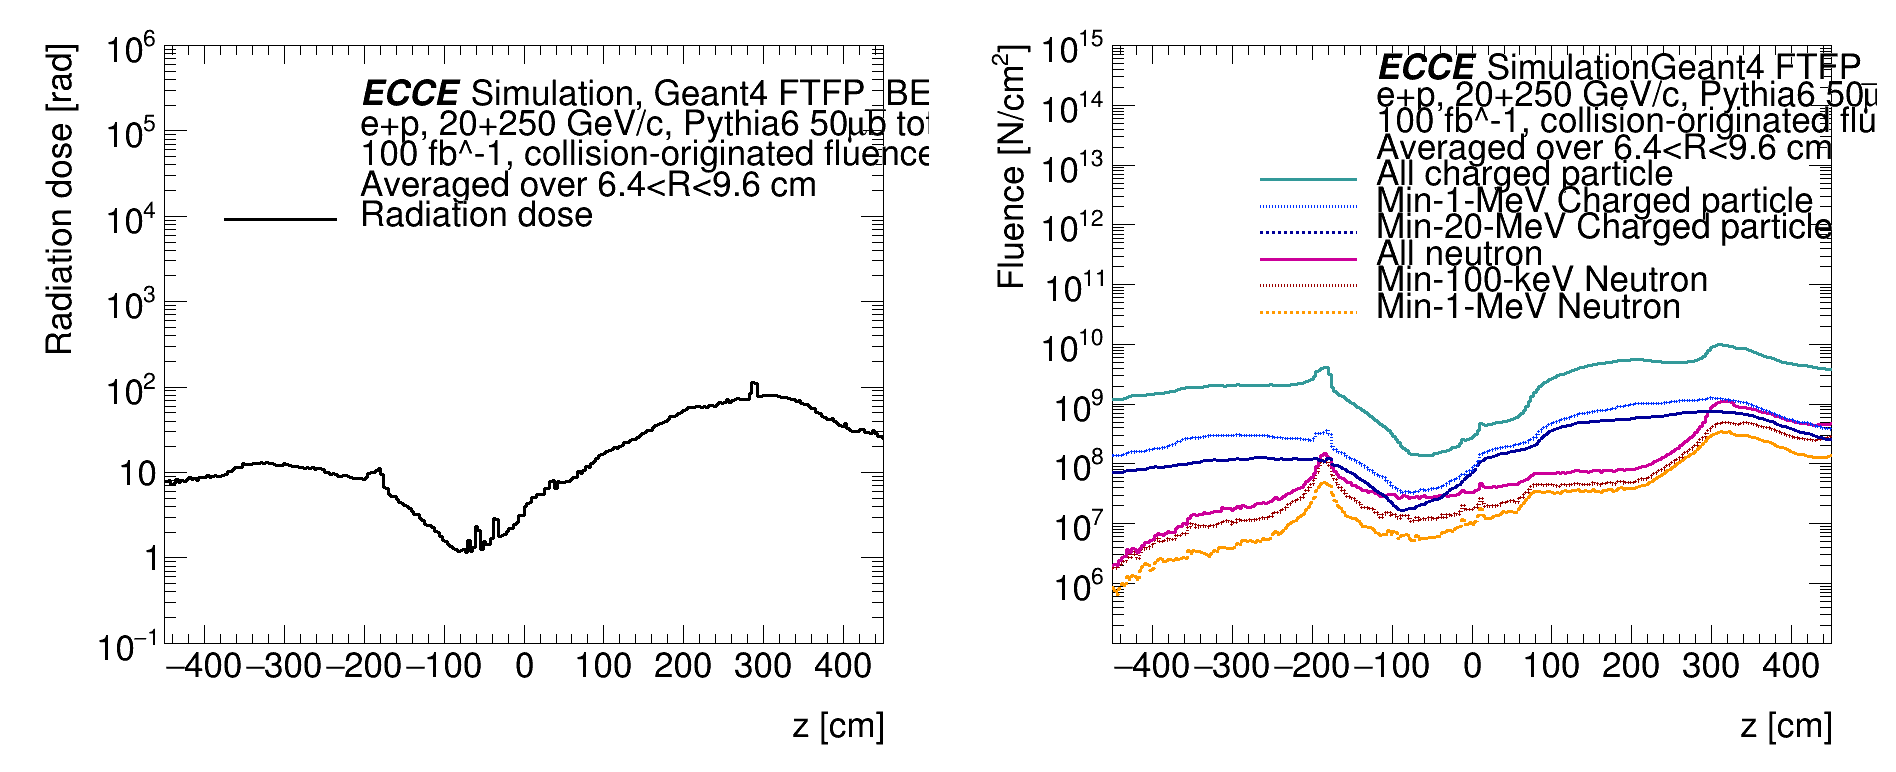

In [26]:
%%cpp

FullCylZProj(normalization, projection_desc, 3);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 2
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 2
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 2
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 2
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 2
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 2
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 2


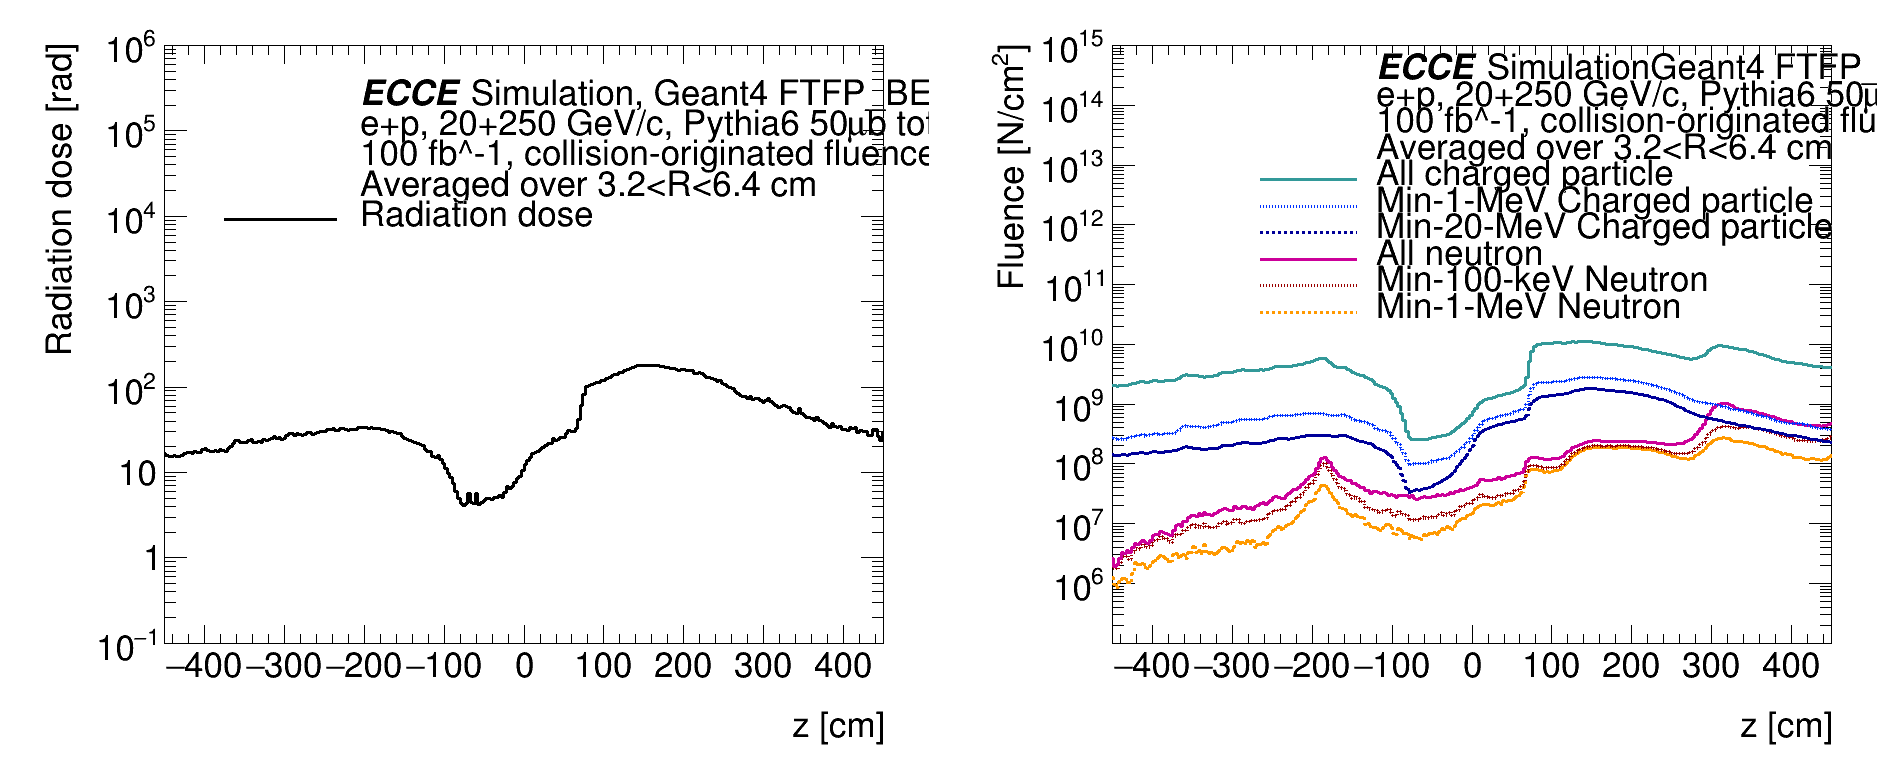

In [27]:
%%cpp

FullCylZProj(normalization, projection_desc, 2);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 1
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 1
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 1
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 1
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 1
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 1
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 1


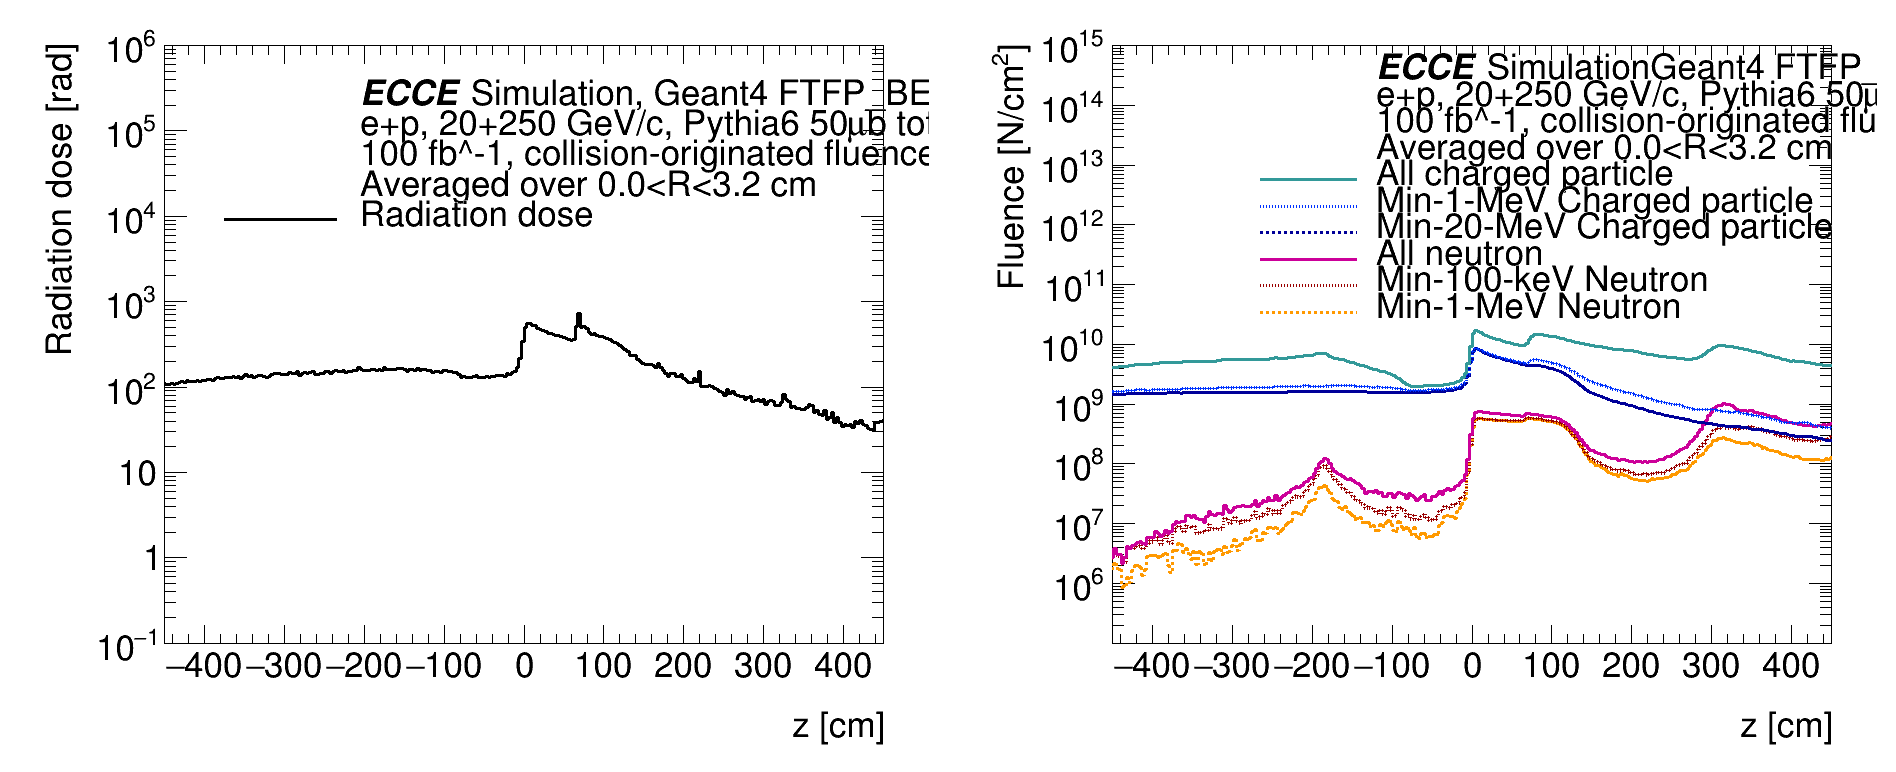

In [28]:
%%cpp

FullCylZProj(normalization, projection_desc, 1);


## Z-dependency - Max bin in phi

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 15
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 15
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 15
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 15
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 15
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 15
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 15
FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 14
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 14
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 14
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 14
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 14
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 14
GetRProjection - hScore_FullCylinder_flux_charged:

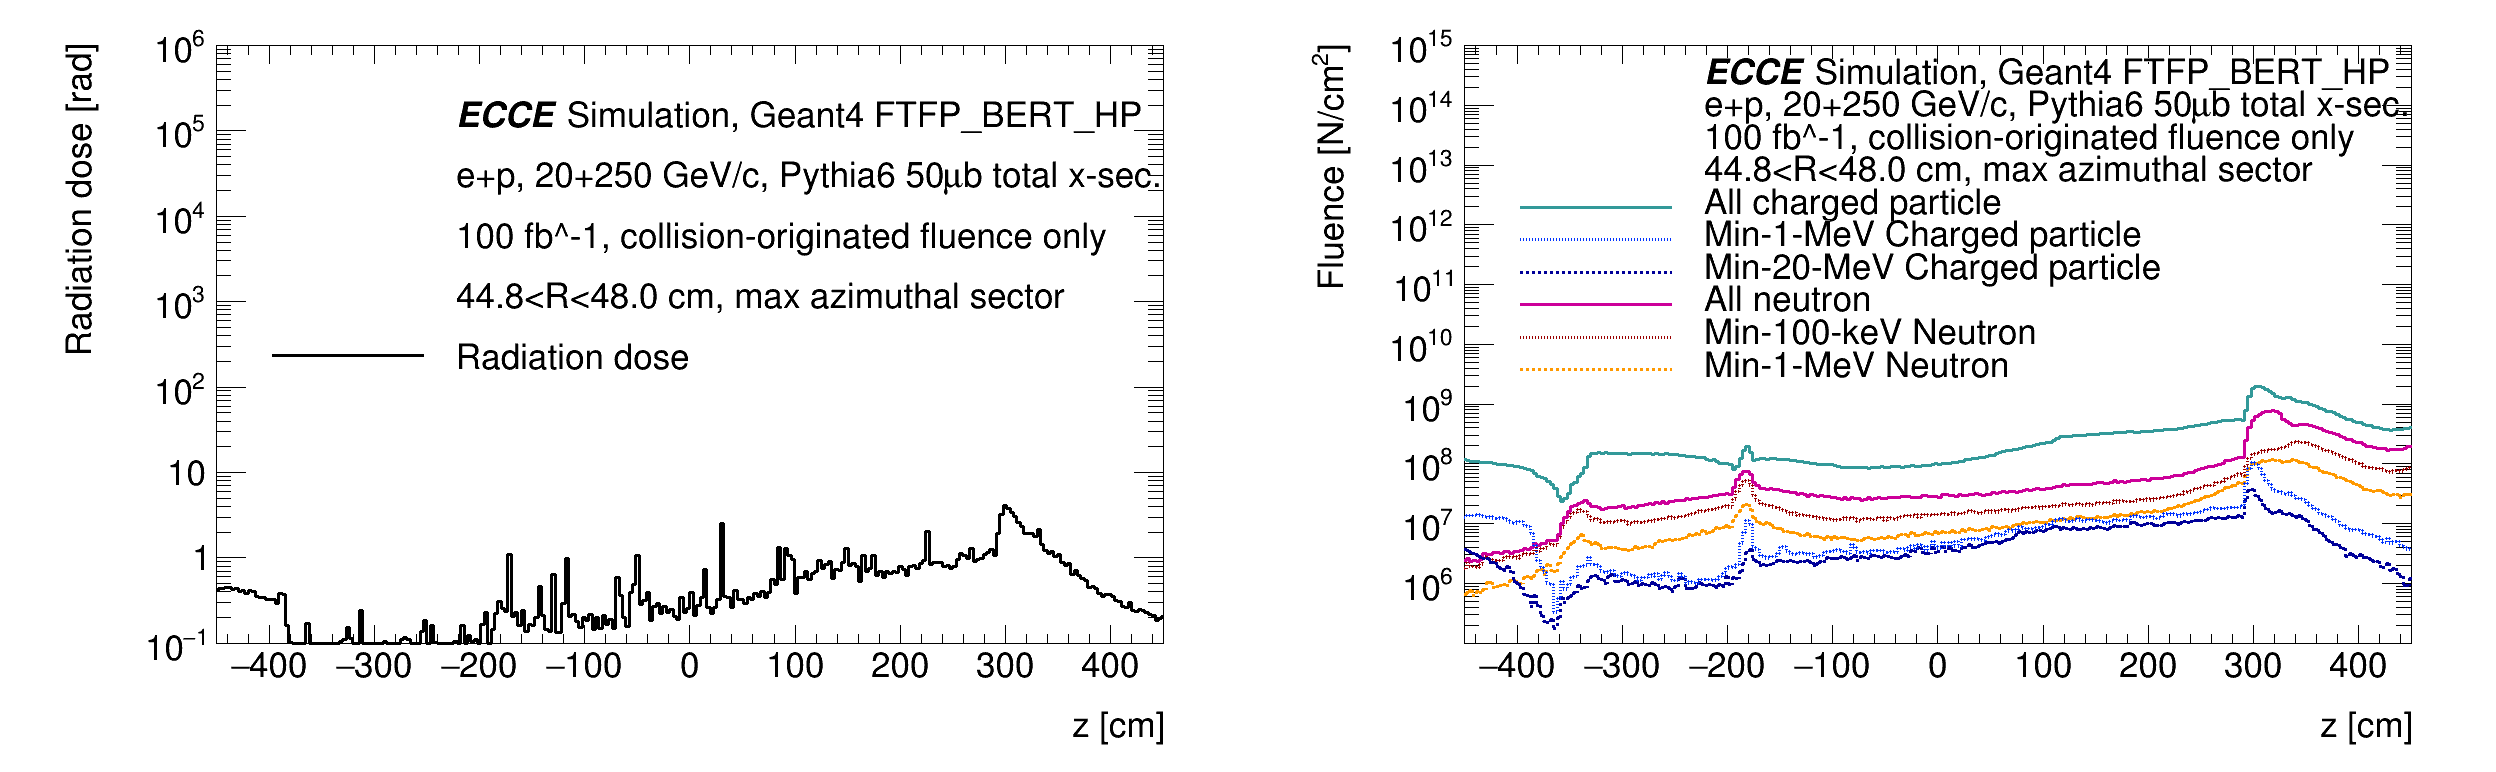

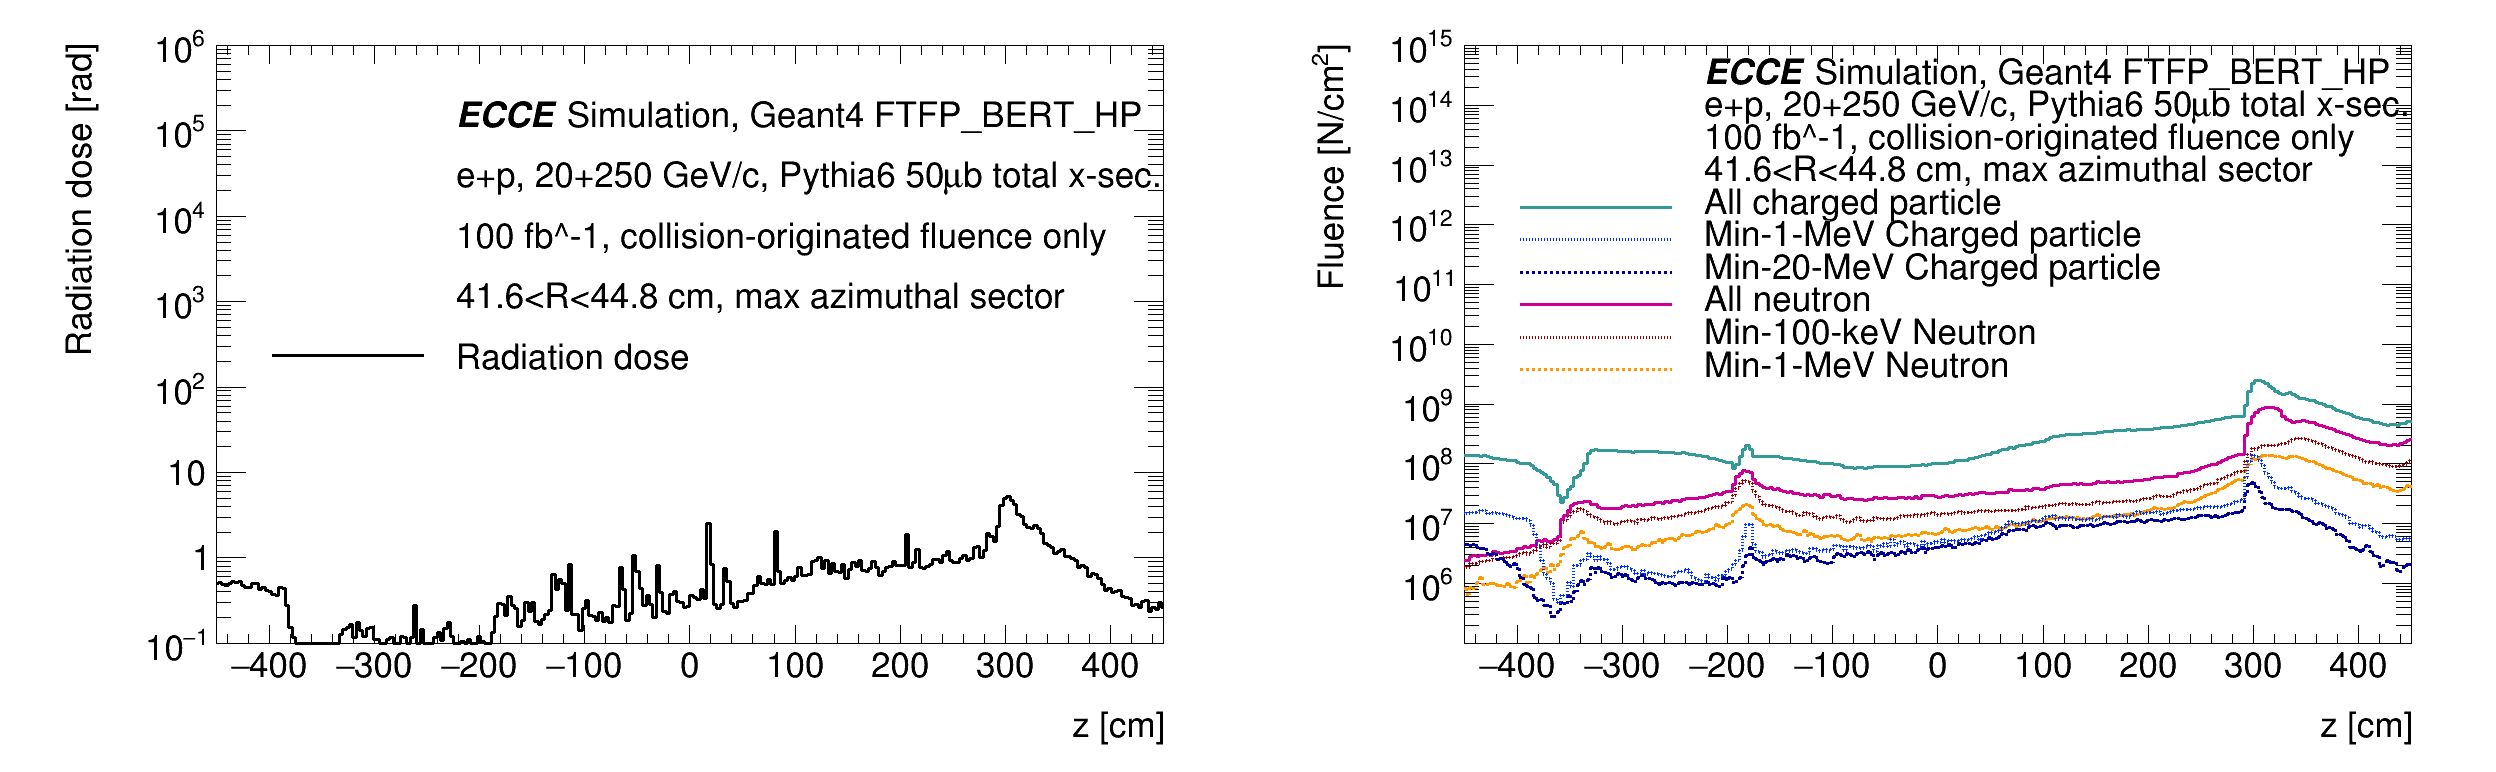

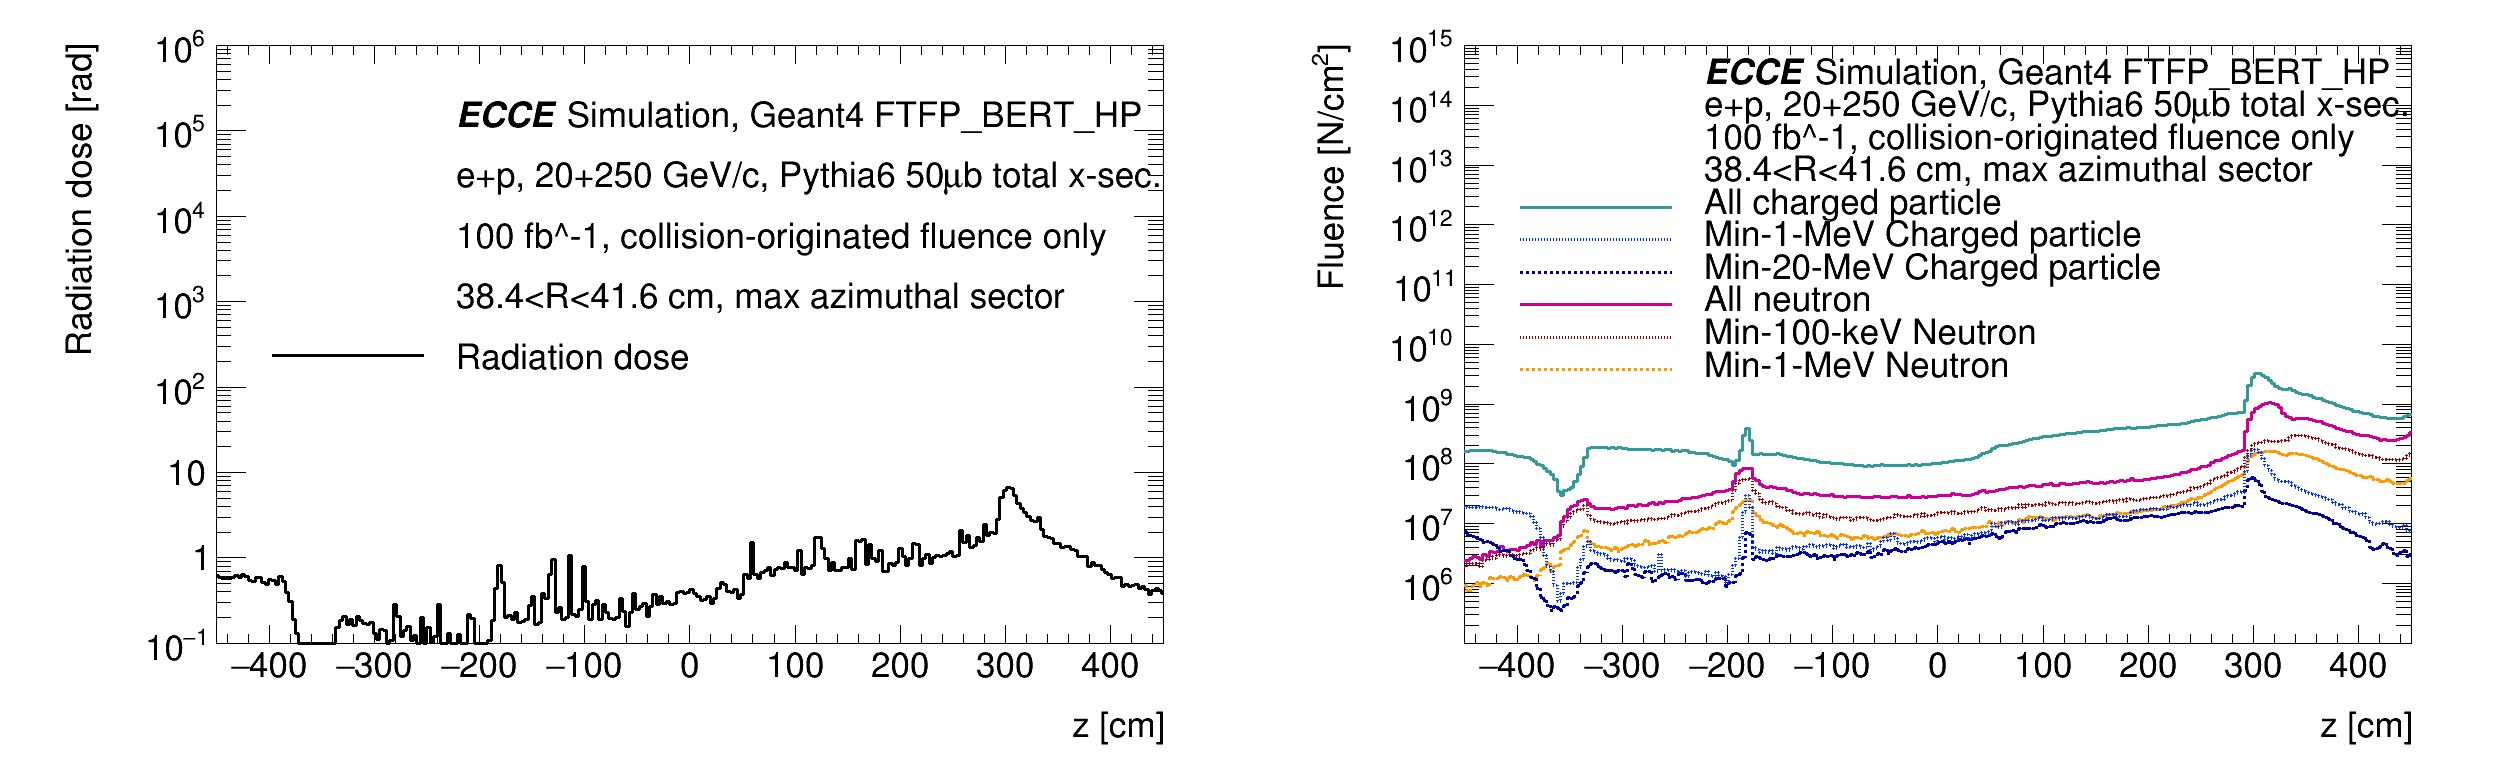

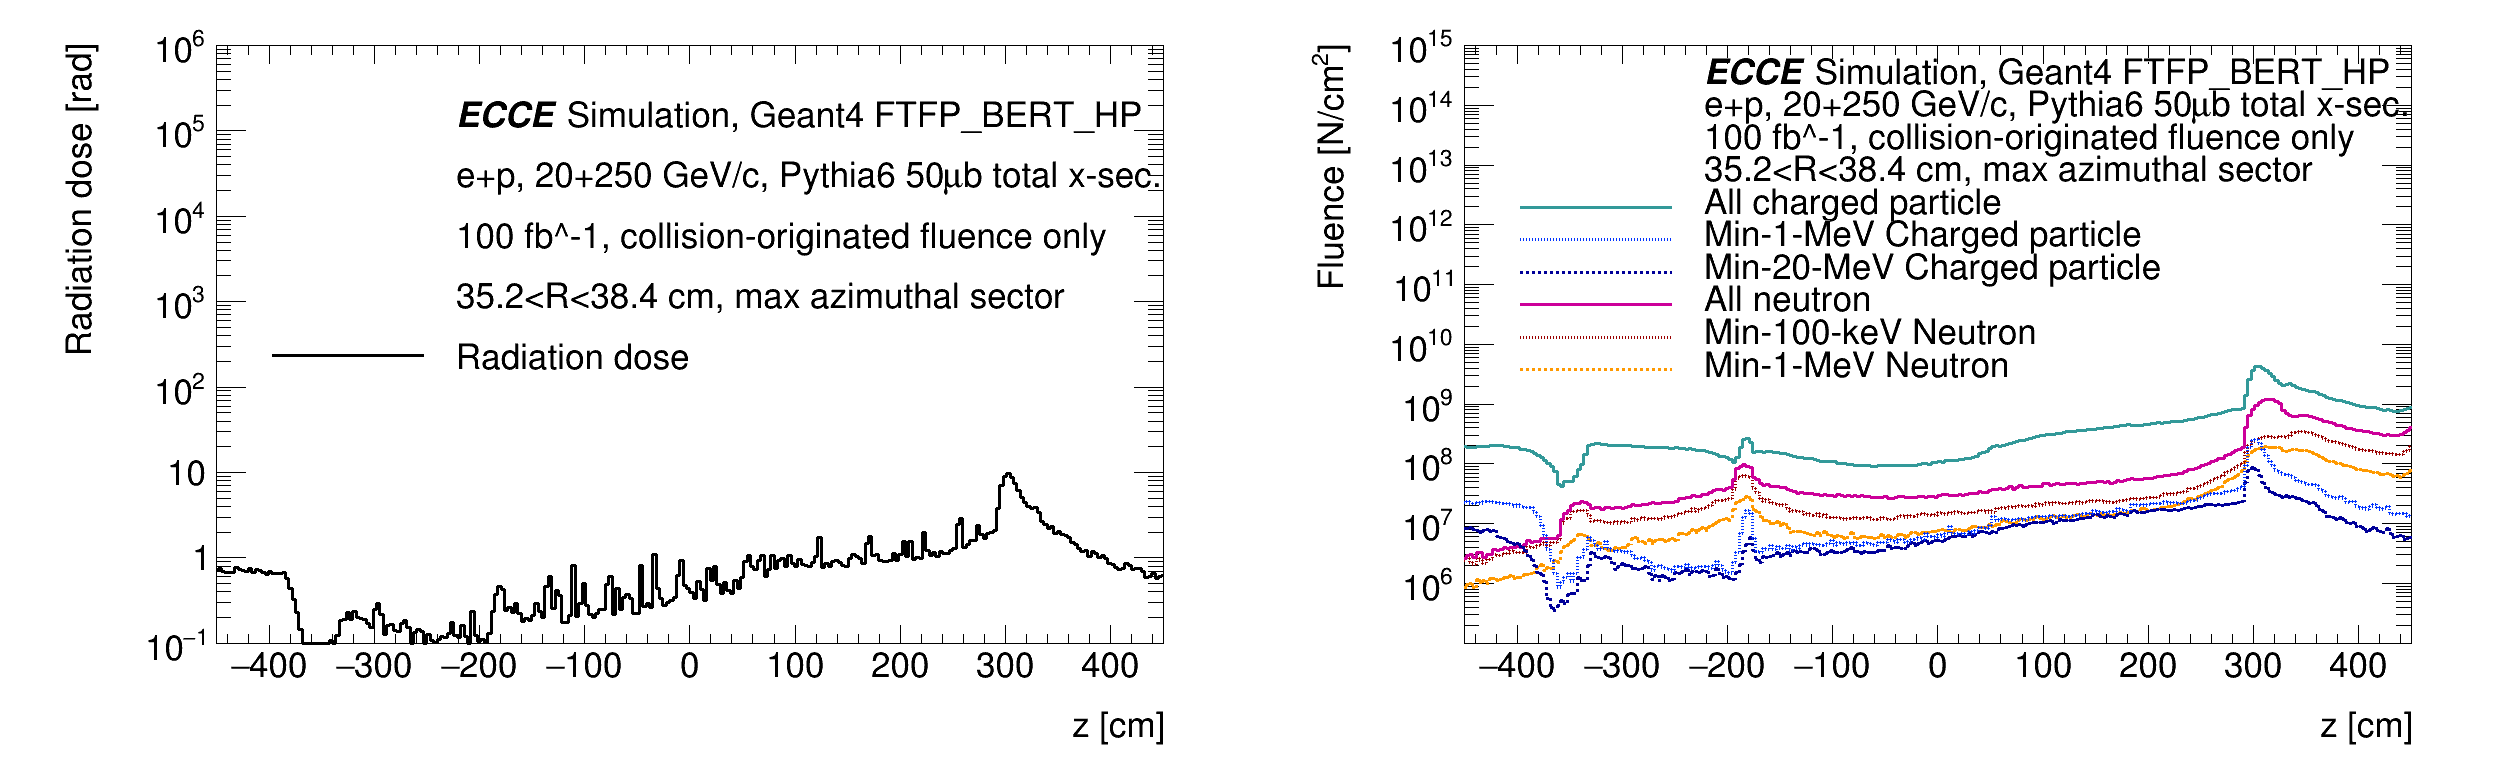

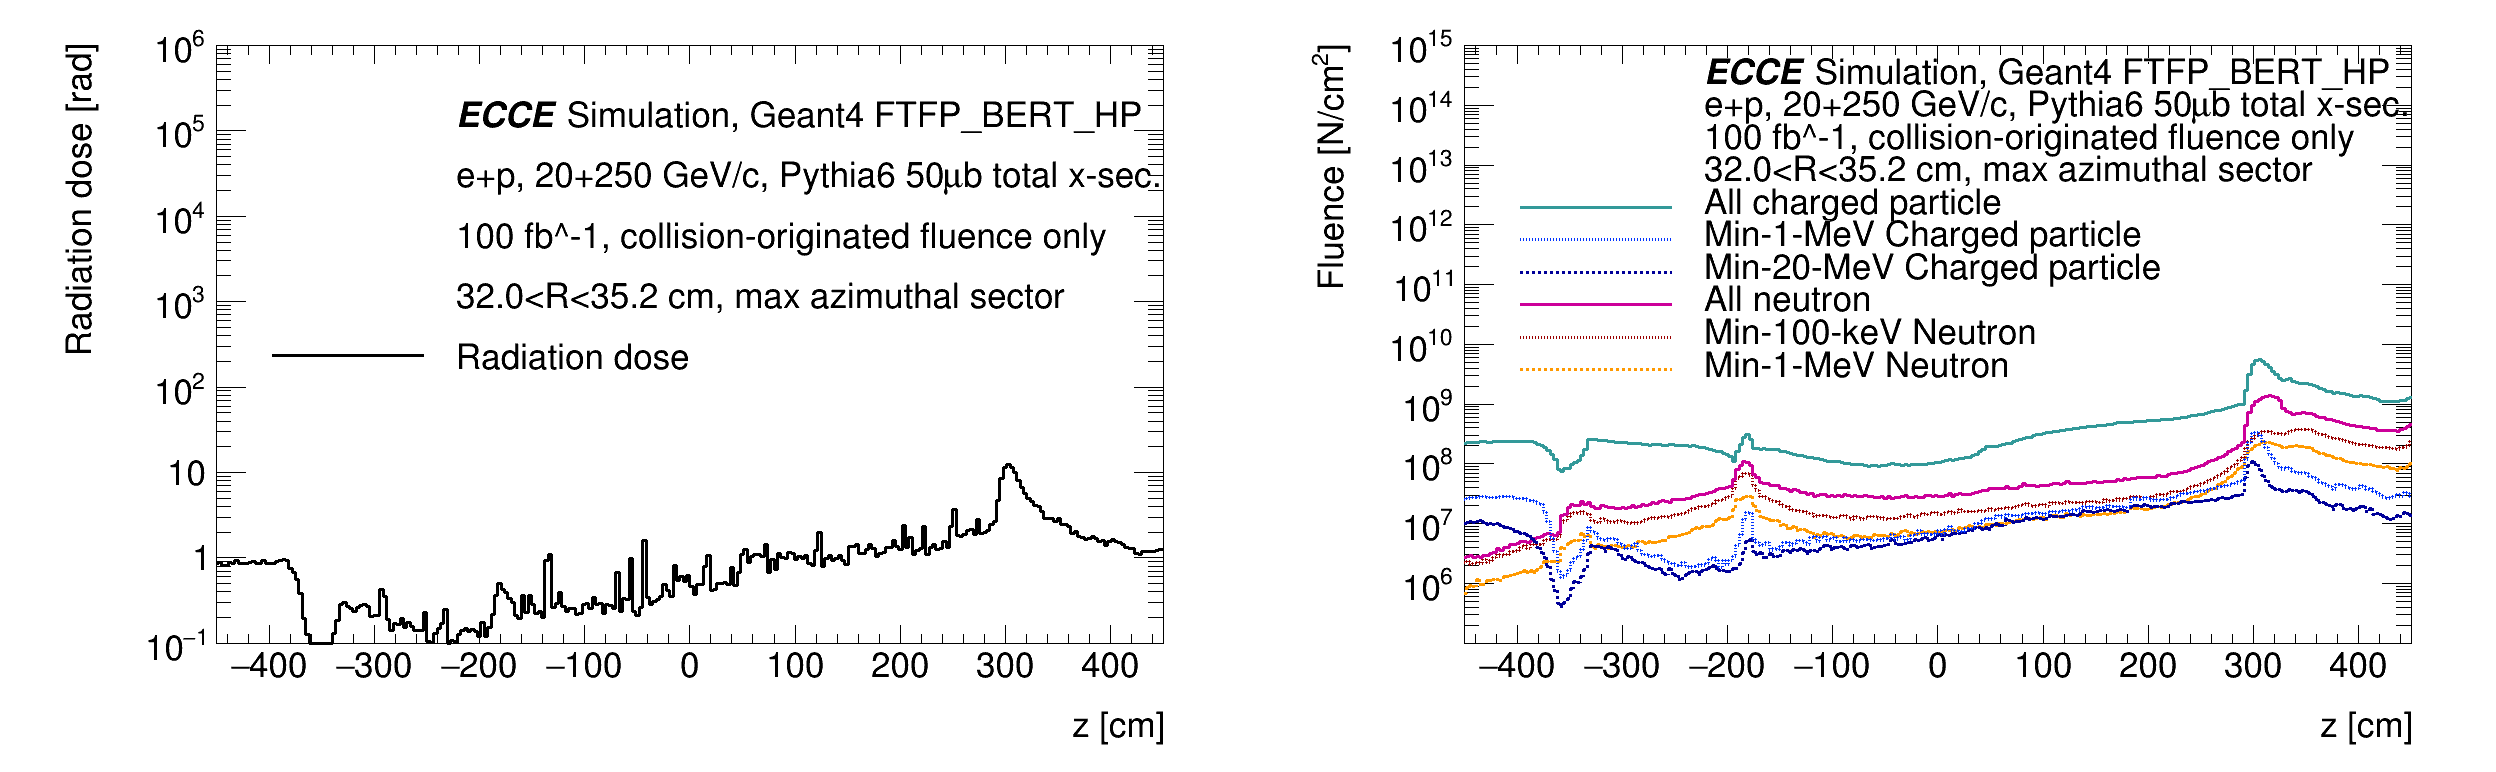

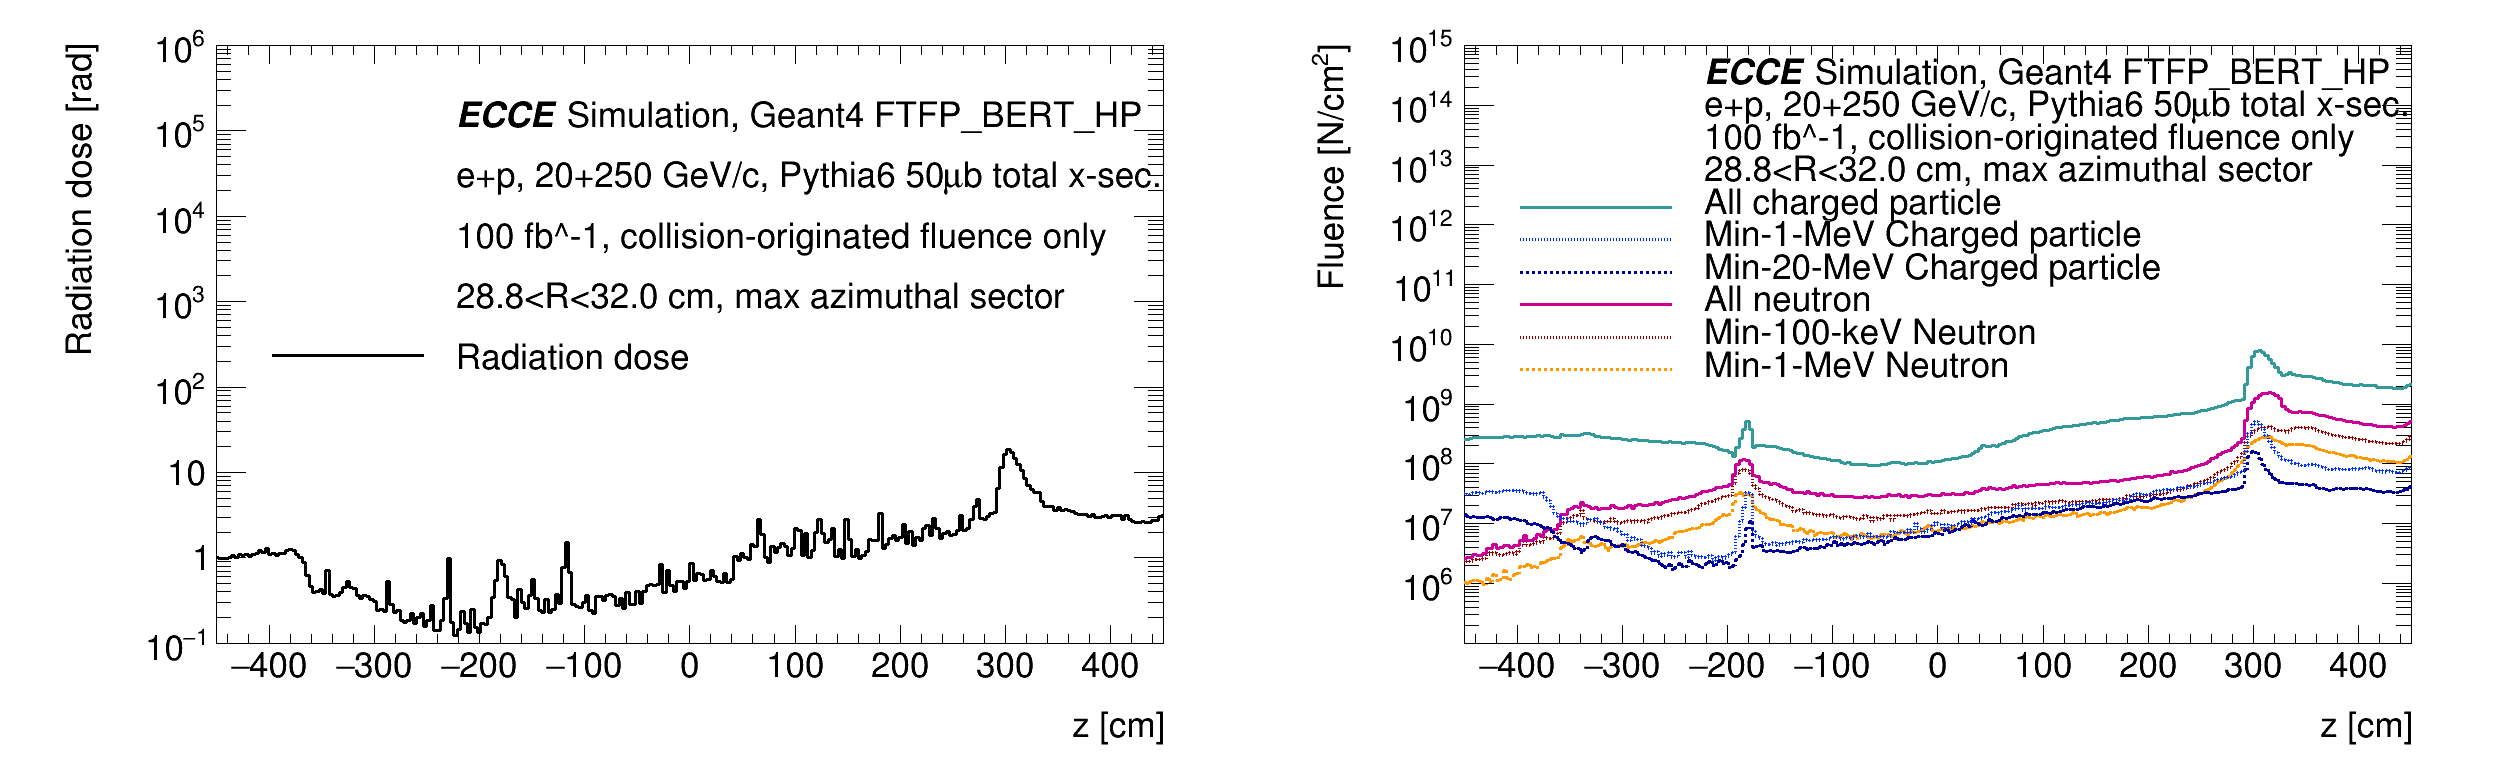

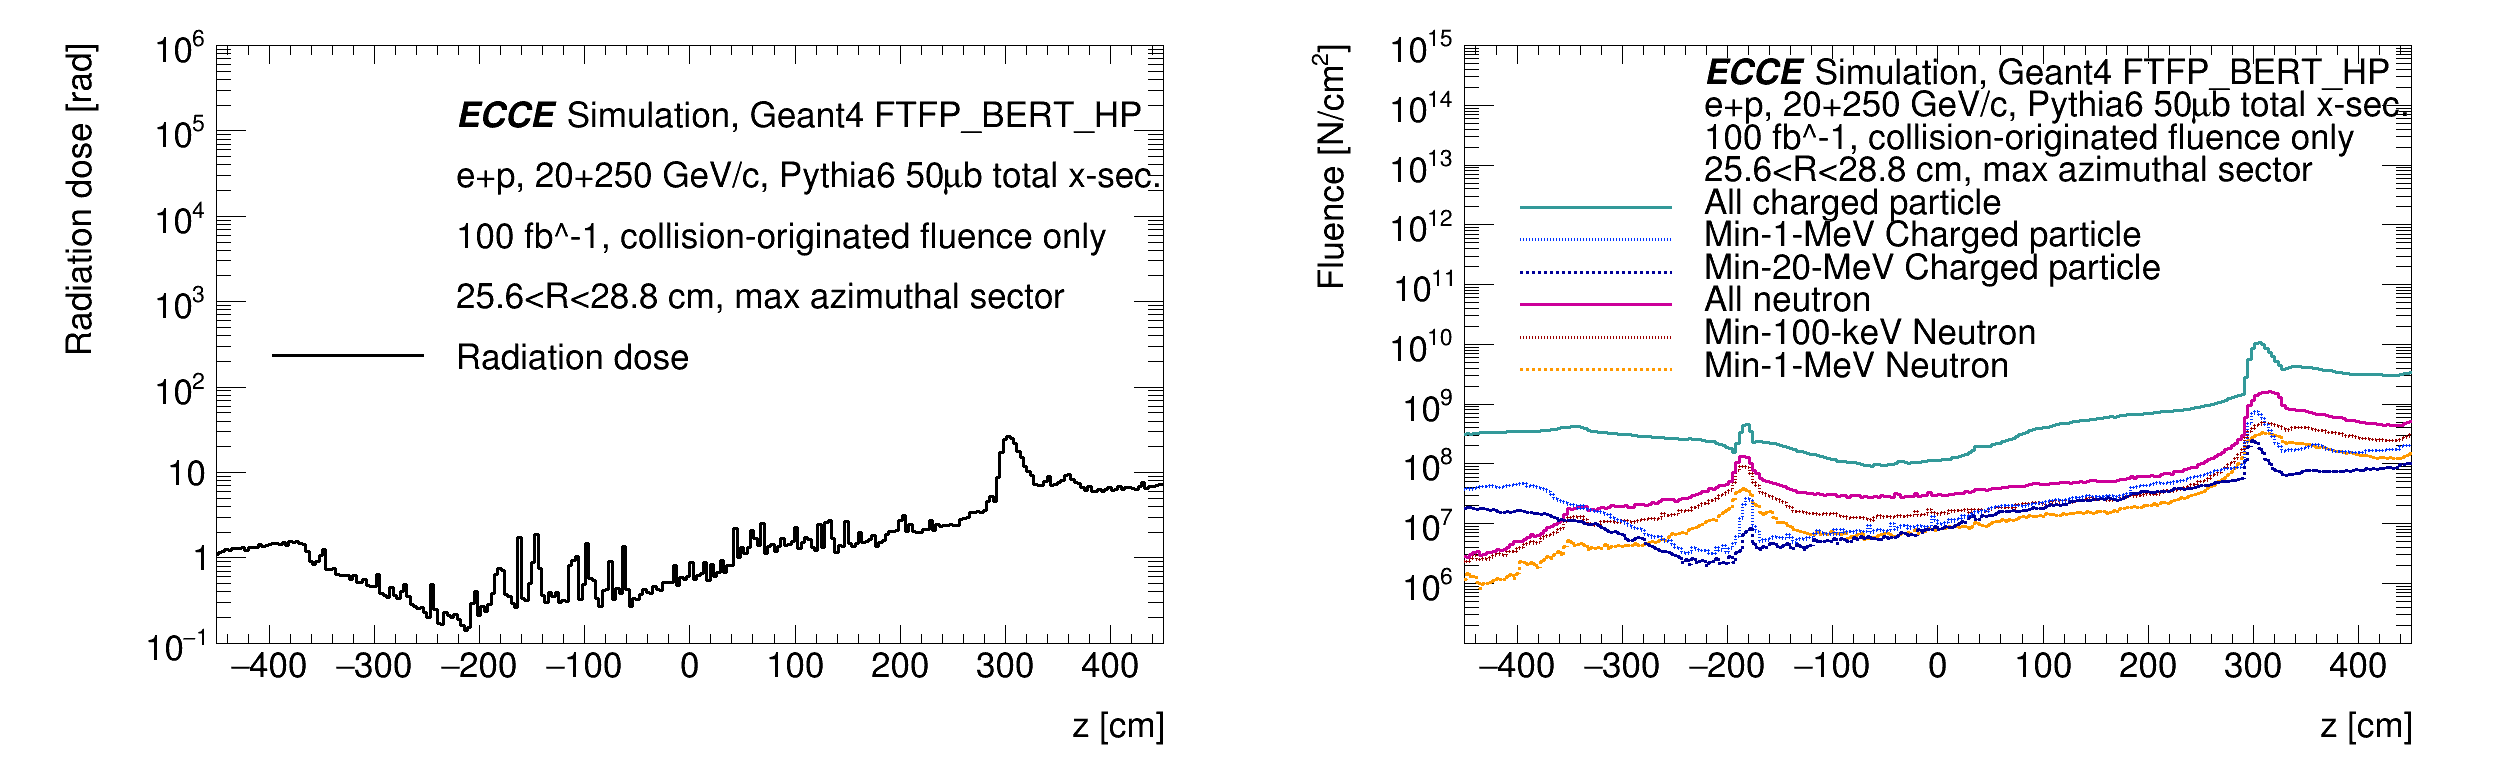

In [29]:
%%cpp

FullCylZProjMaxPhi(normalization, projection_desc, 15);
FullCylZProjMaxPhi(normalization, projection_desc, 14);
FullCylZProjMaxPhi(normalization, projection_desc, 13);
FullCylZProjMaxPhi(normalization, projection_desc, 12);
FullCylZProjMaxPhi(normalization, projection_desc, 11);
FullCylZProjMaxPhi(normalization, projection_desc, 10);
FullCylZProjMaxPhi(normalization, projection_desc, 9);

FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 8
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 8
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 8
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 8
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 8
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 8
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 8
FullCylZProj - use vertical scale for EIC = 0.001
GetRProjection - hScore_FullCylinder_dose: r_bin 7
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin100keV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_neutron_EkMin1MeV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_neutron: r_bin 7
GetRProjection - hScore_FullCylinder_flux_charged_EkMin20MeV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_charged_EkMin1MeV: r_bin 7
GetRProjection - hScore_FullCylinder_flux_charged: r_bin 7
Full

Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_7
Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_6
Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_5
Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_4
Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_3
Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: FullCylZProj_1


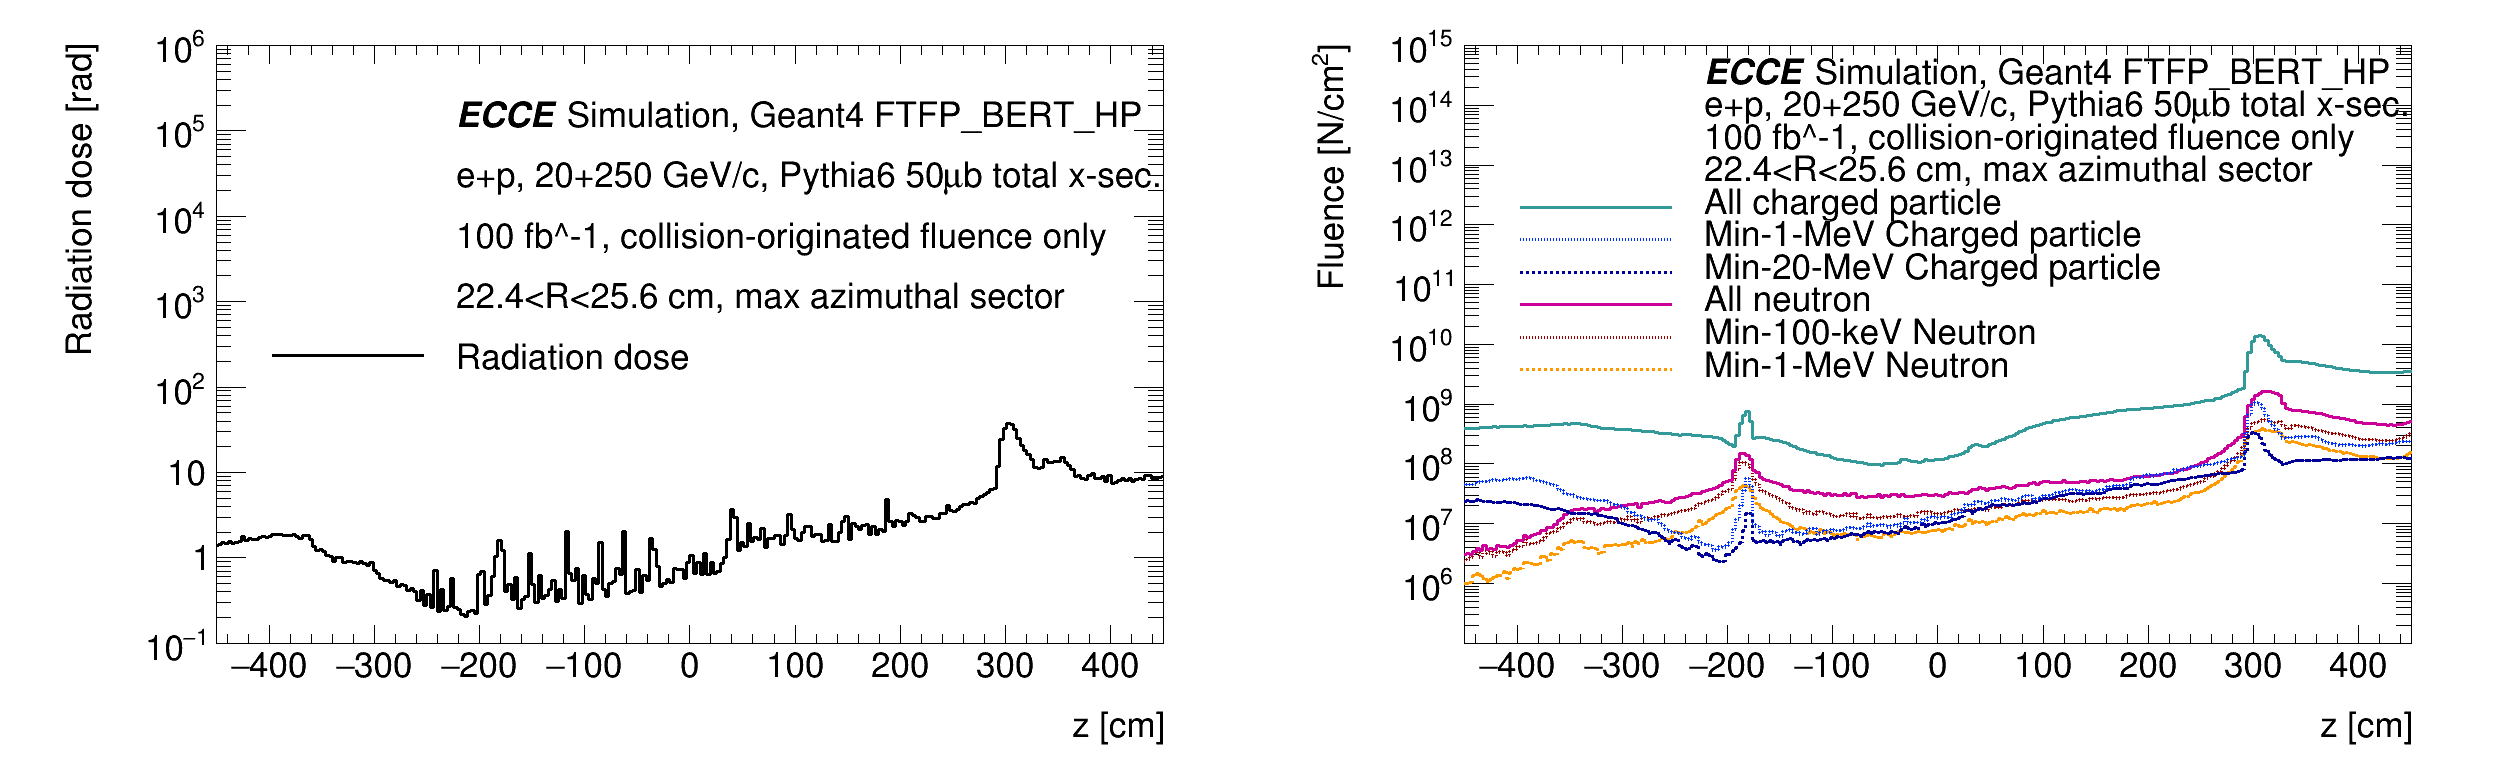

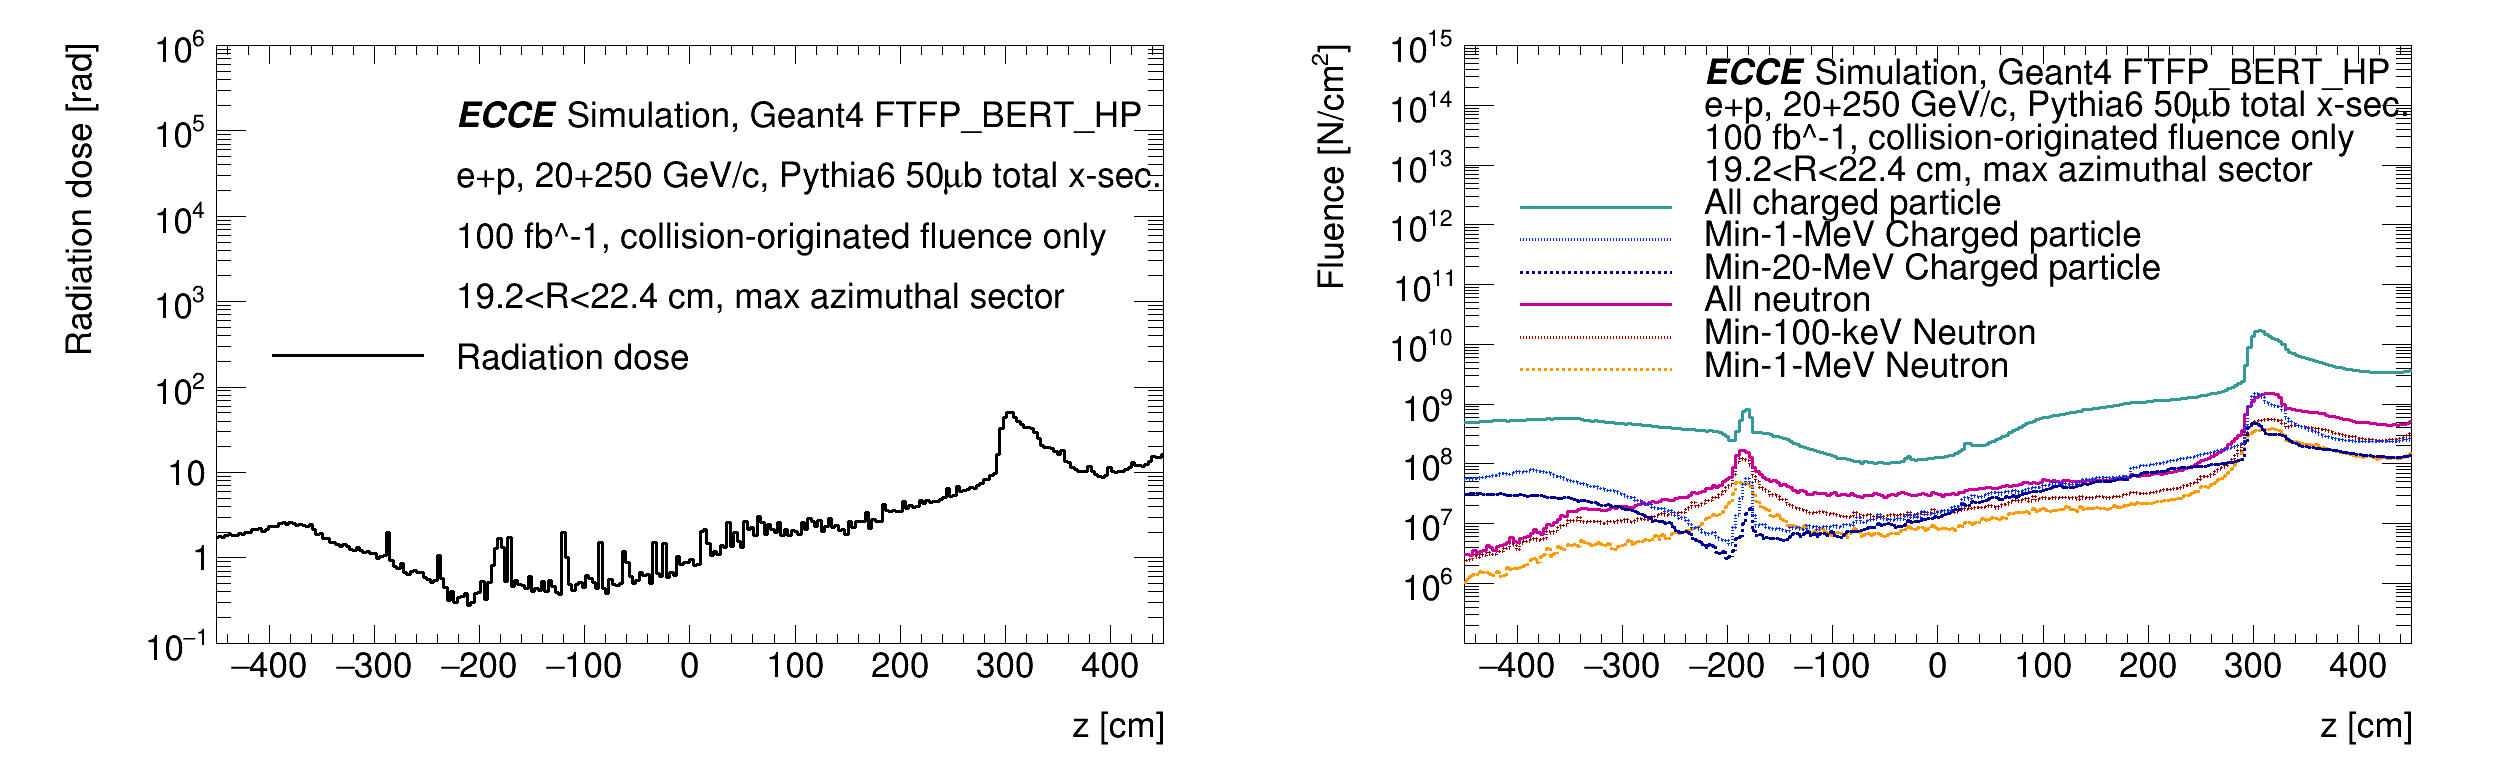

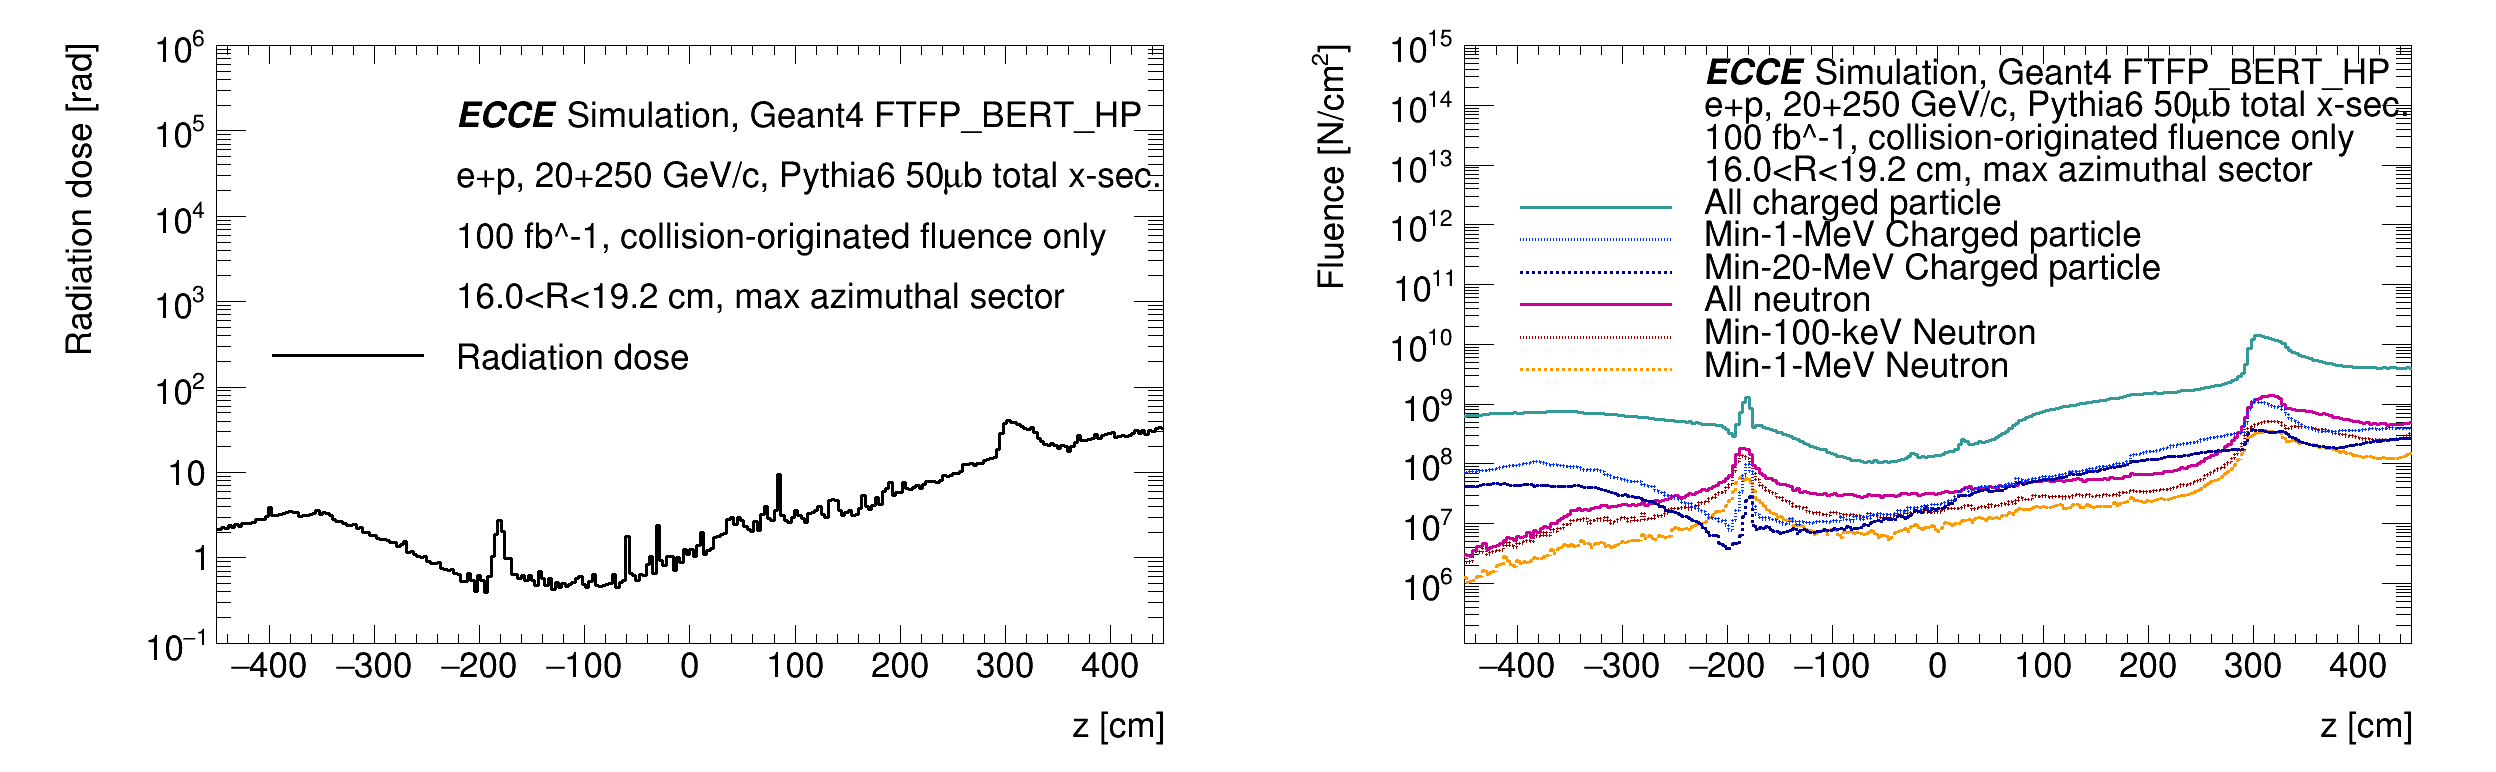

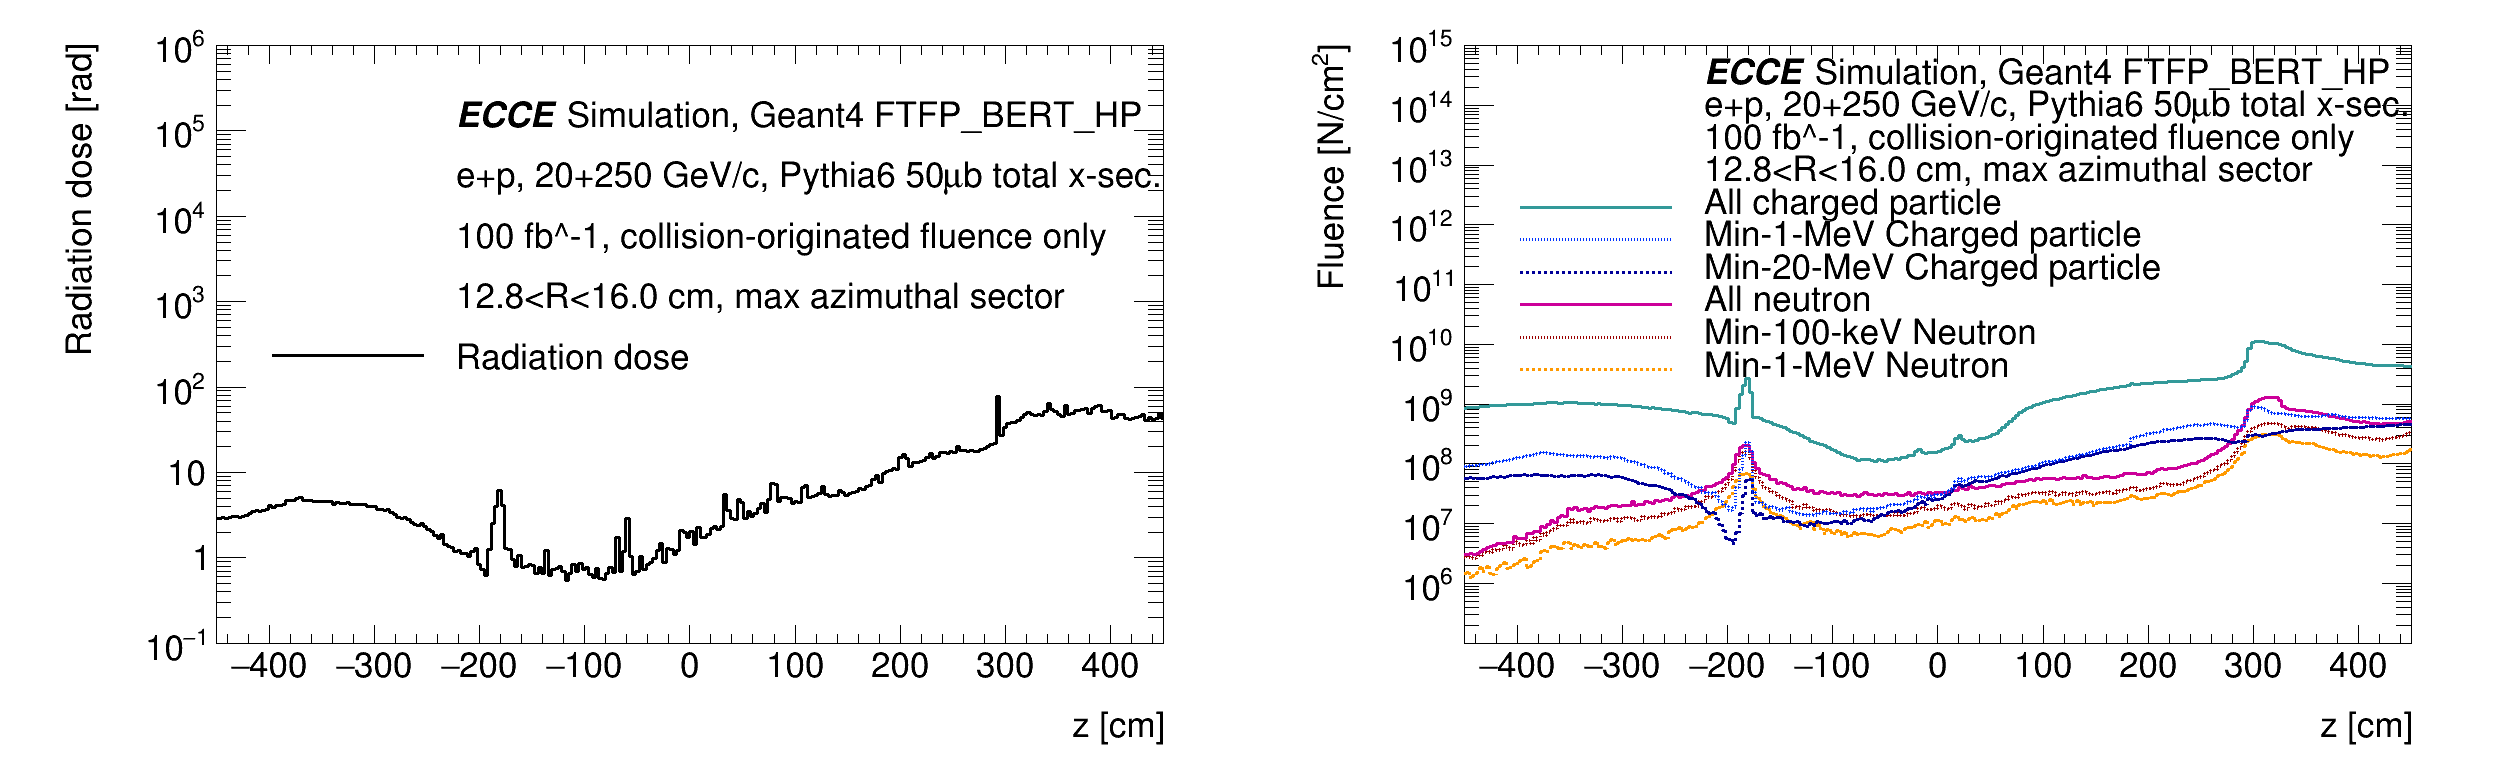

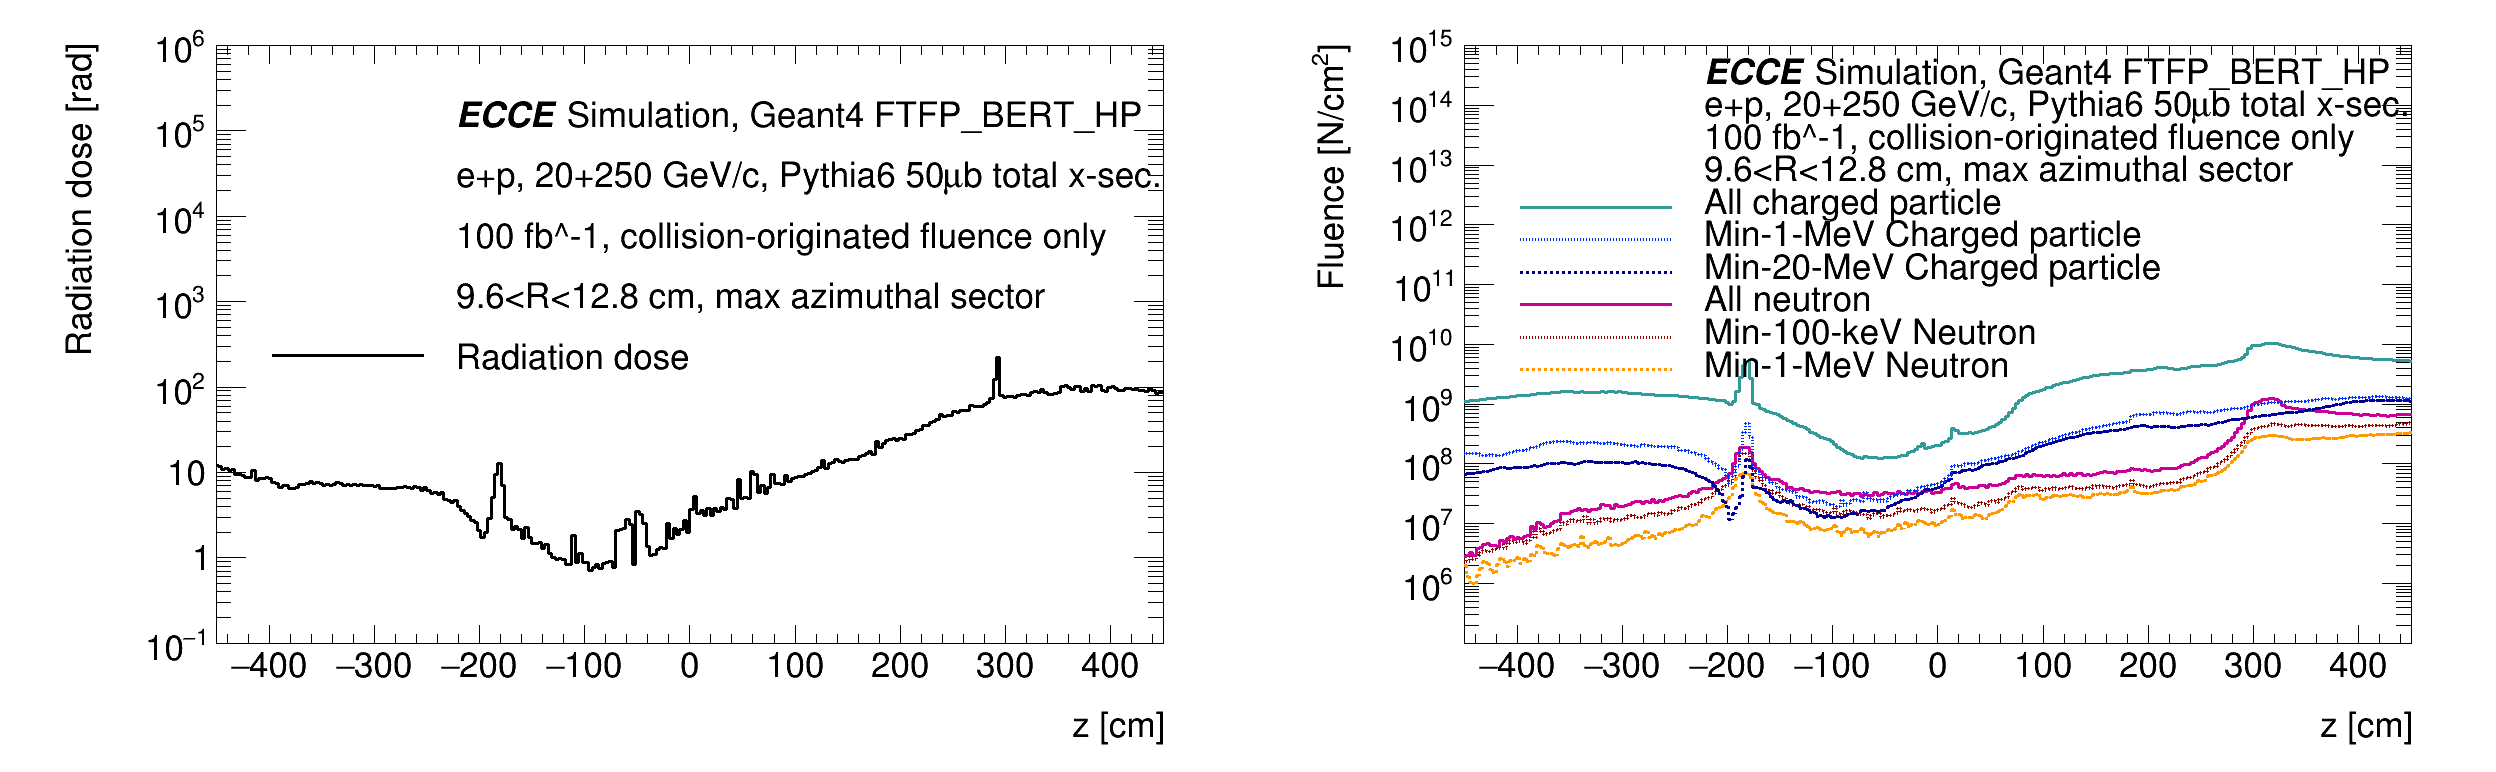

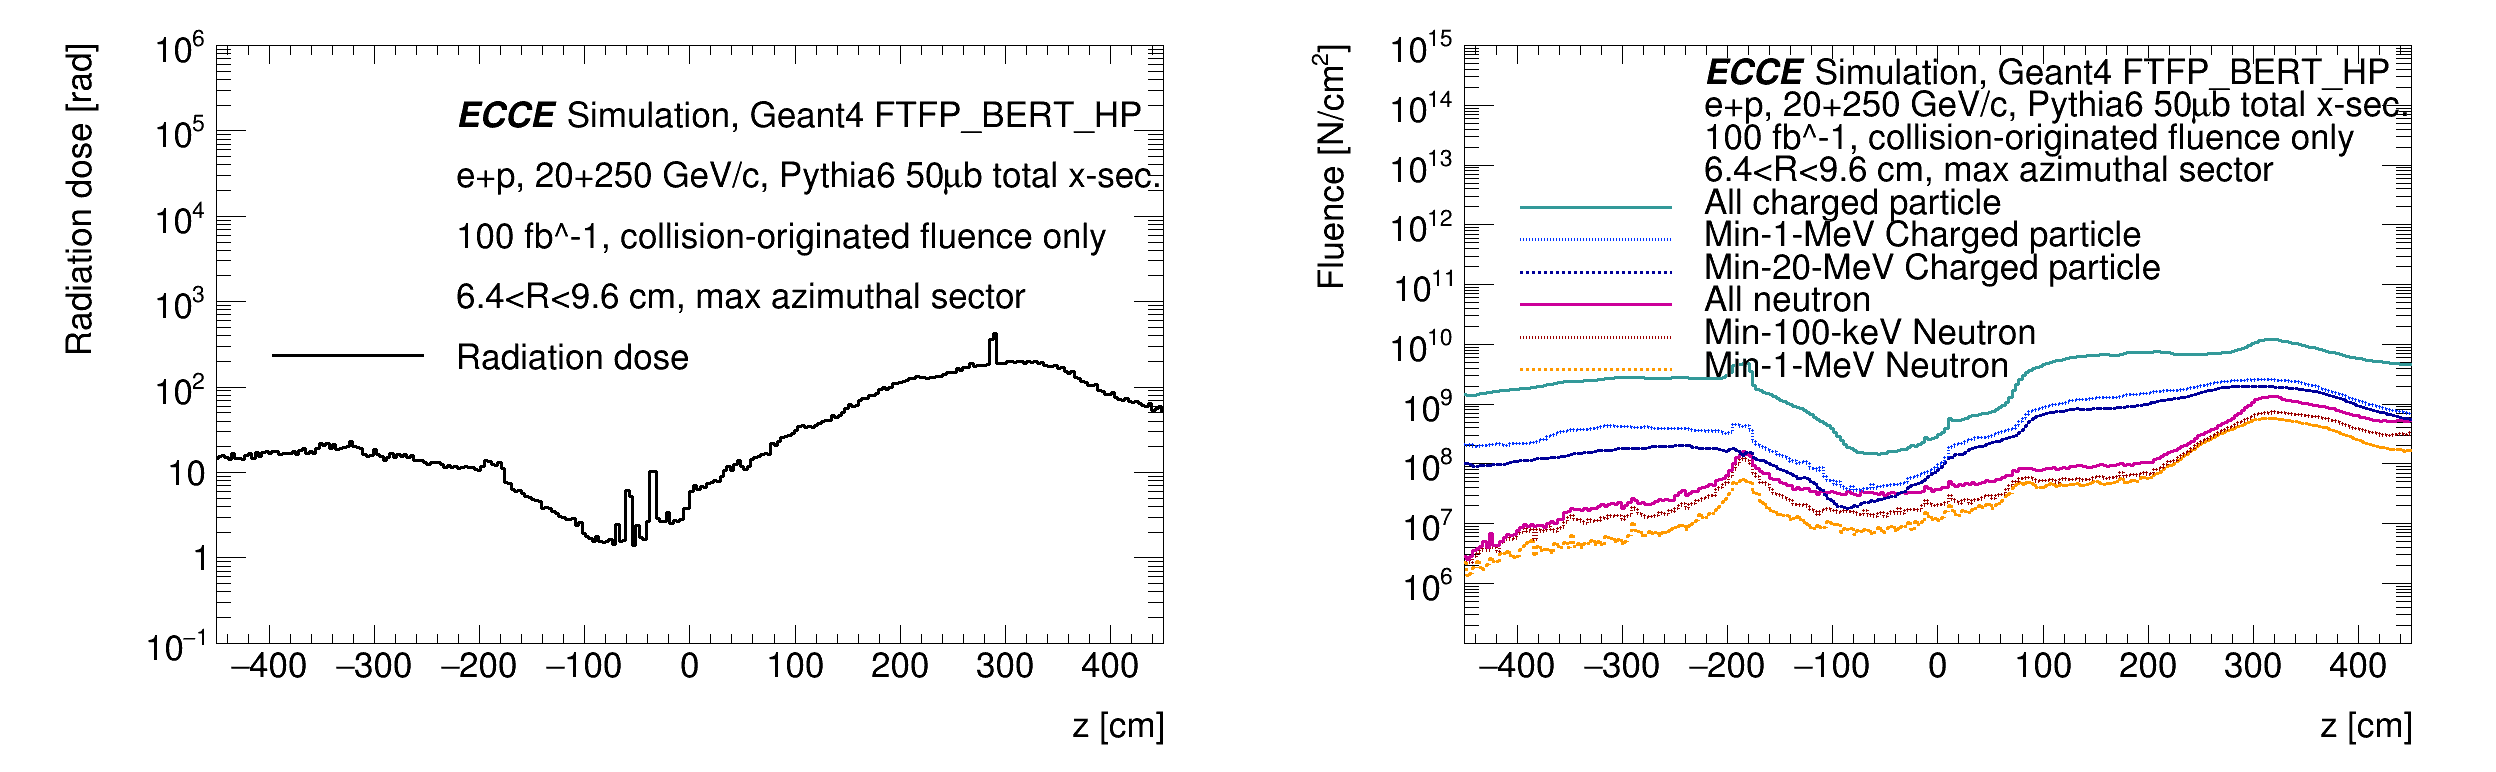

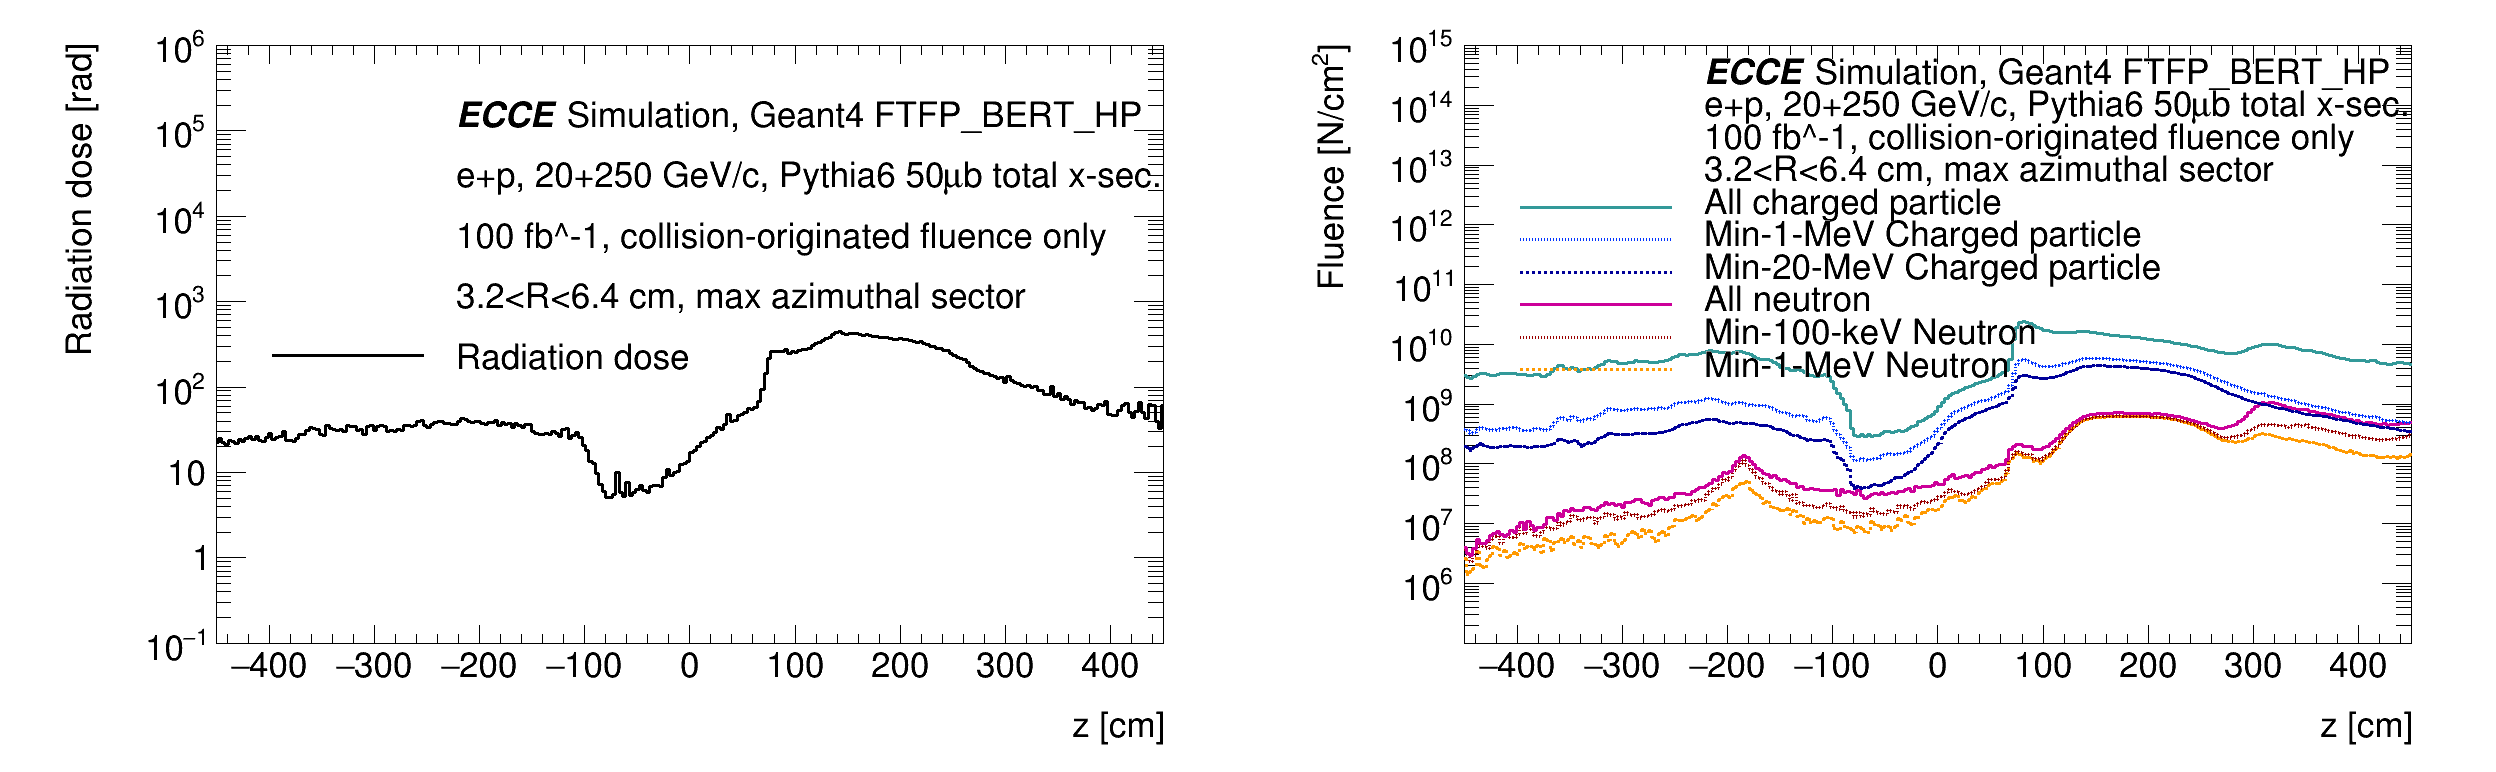

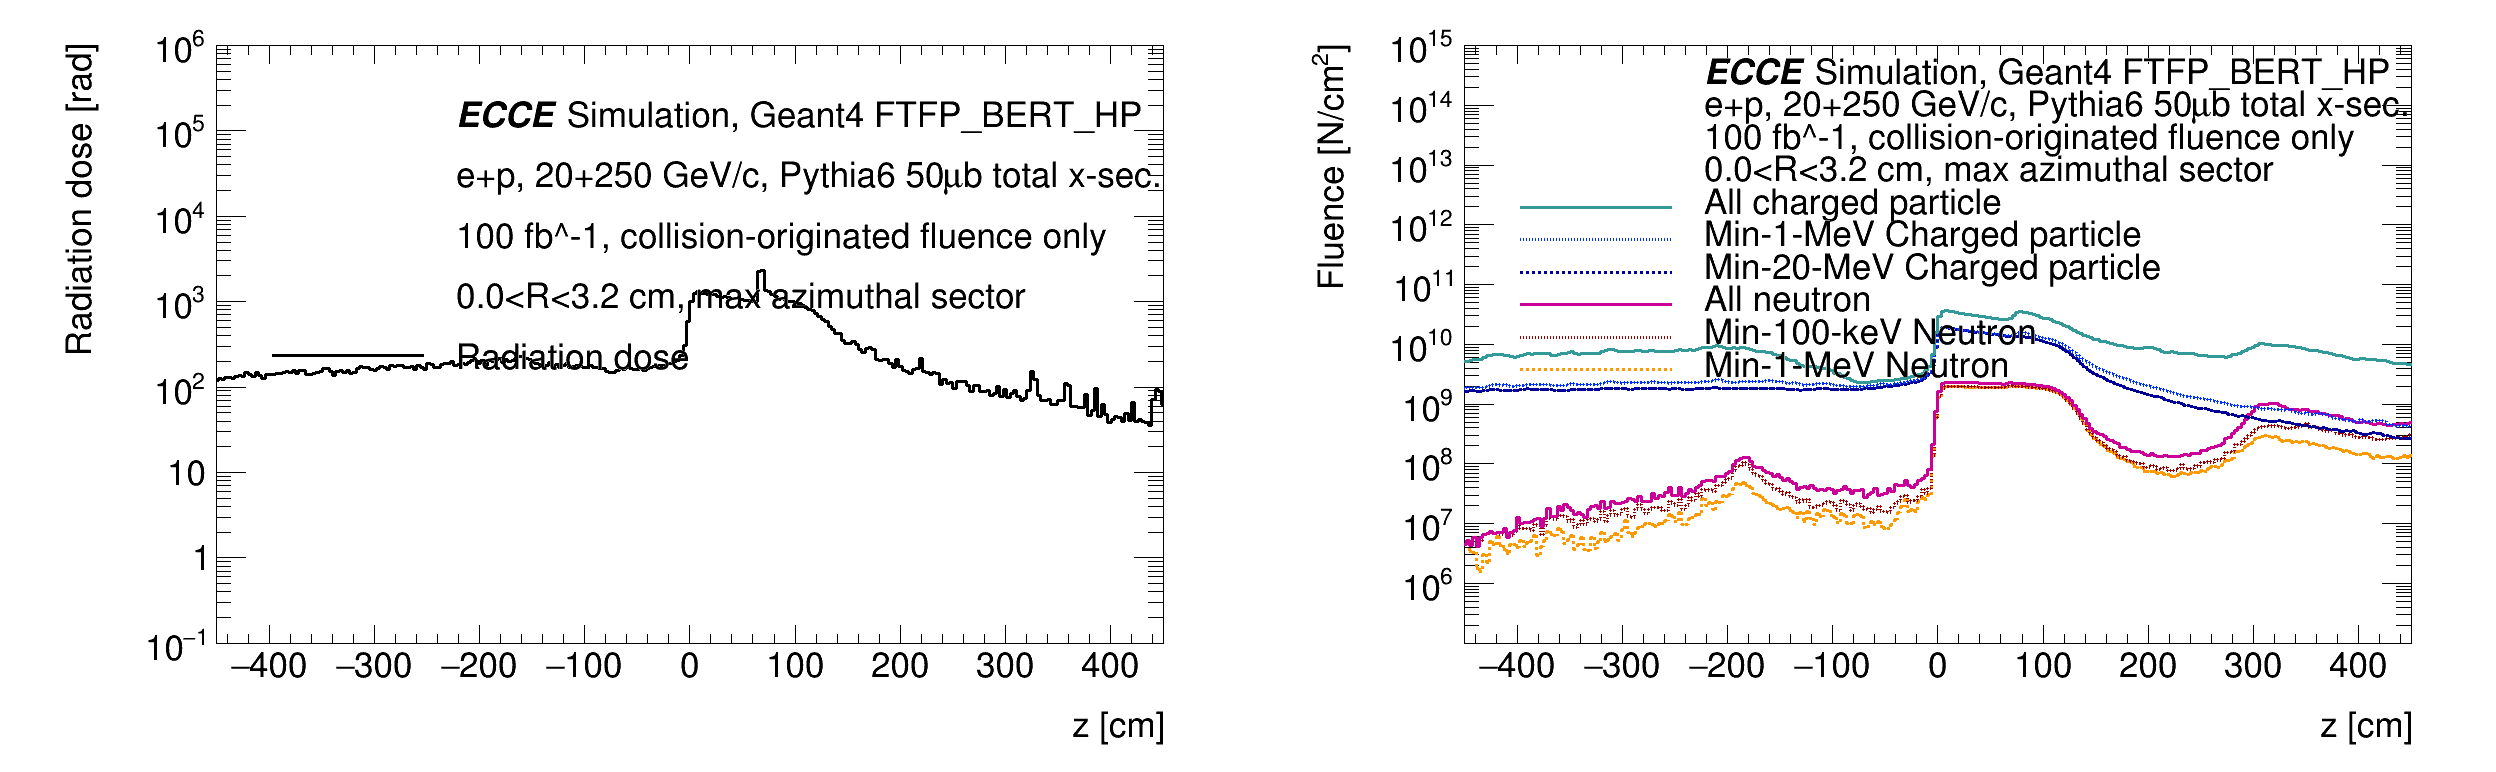

In [30]:
%%cpp

FullCylZProjMaxPhi(normalization, projection_desc, 8);
FullCylZProjMaxPhi(normalization, projection_desc, 7);
FullCylZProjMaxPhi(normalization, projection_desc, 6);
FullCylZProjMaxPhi(normalization, projection_desc, 5);
FullCylZProjMaxPhi(normalization, projection_desc, 4);
FullCylZProjMaxPhi(normalization, projection_desc, 3);
FullCylZProjMaxPhi(normalization, projection_desc, 2);
FullCylZProjMaxPhi(normalization, projection_desc, 1);